# Introduction 

Microsoft Fabric's data warehoue is a modern verion of the traditional data warehouse.
+ It centralizes and organizes data from diffrent departments, systems, and databases into a single a univied view for analysis and reporting purposes.
+ Provides full SQL semantics include insert, update and delate data in the tables.
+ It build on leakhouse, which is stored in Delta Format and can query by SQL.
+ Fabrics enalbles data engineers, analyst, and data scientist to work together to create and query a data warehouse that optimized for their specific needs.

  The process of building a modern data warehouse typically consists of:

+ Data ingestion - moving data from source systems into a data warehouse.
+ Data storage - storing the data in a format that is optimized for analytics.
+ Data processing - transforming the data into a format that is ready for consumption by analytical tools.
+ Data analysis and delivery - analyzing the data to gain insights and delivering those insights to the business.


# Describe a data warehouse in Fabric

+ You can create your data warehouse directly in Fabric from the create hub or within a workspace.
+ After creating an empty warehouse, you can add objects to it.

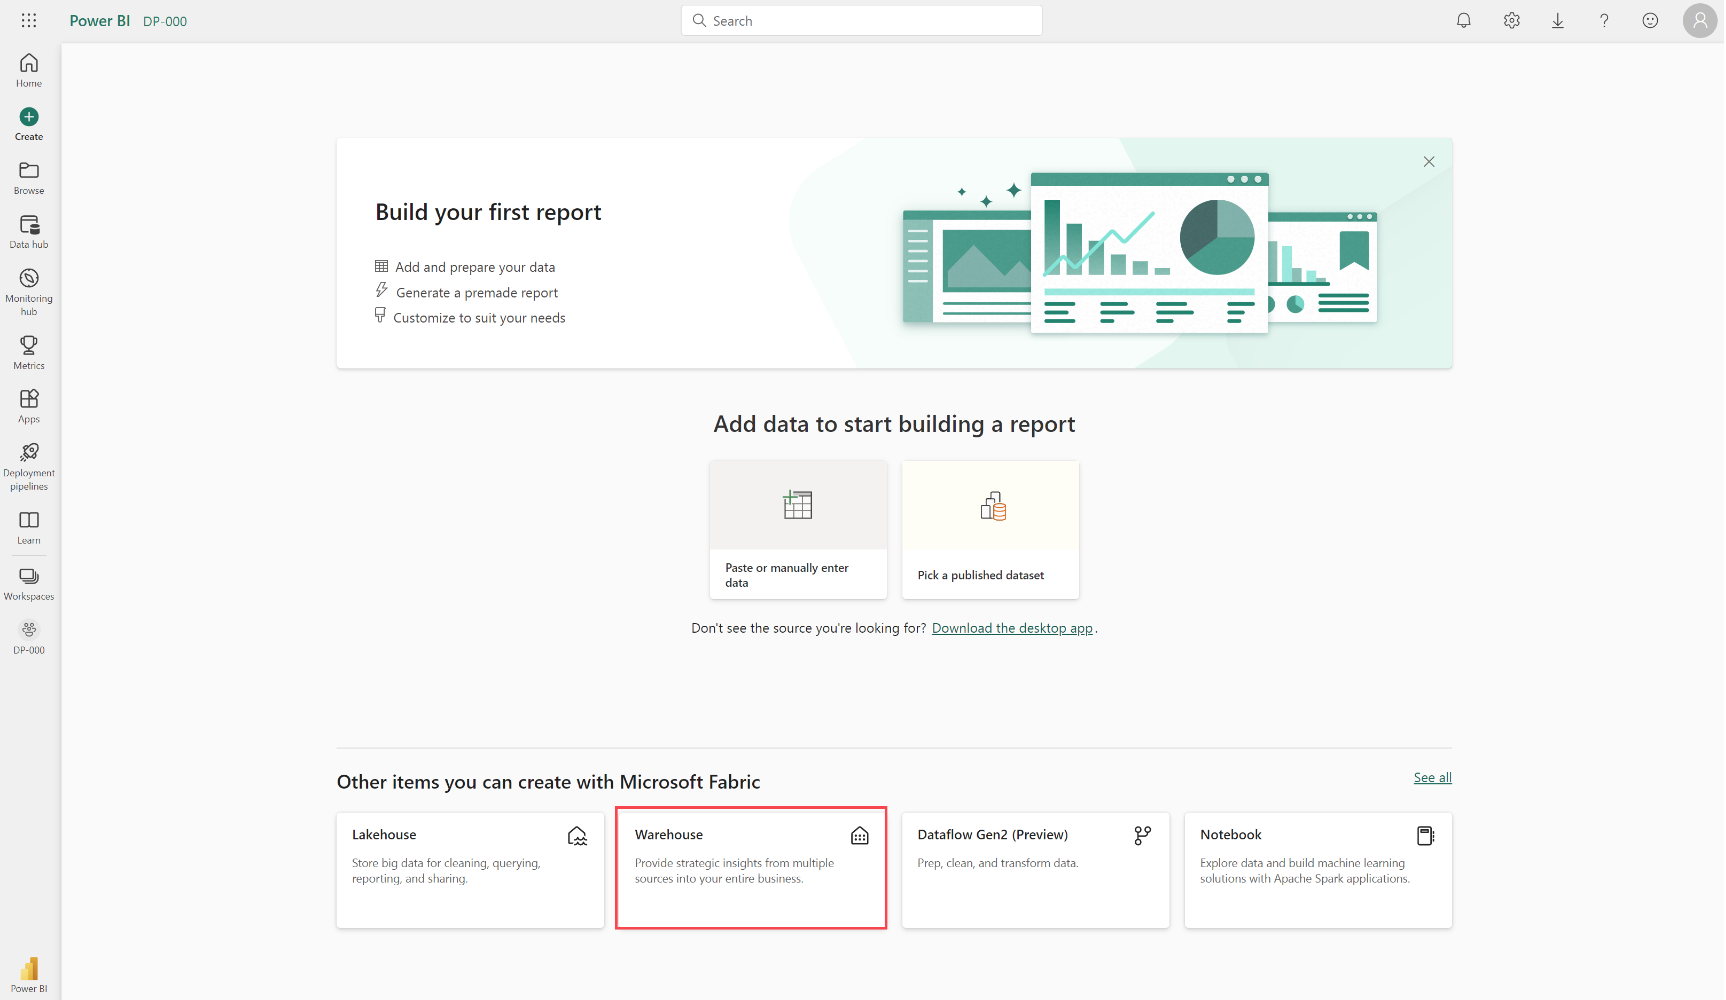

+ Once your warehouse is created, you can create tables using T-SQL directly in the Fabric interface.



# Ingest data into your data warehouse
There are a few ways to ingest data into a Fabric data warehouse, including Pipelines, Dataflows, cross-database querying, and the COPY INTO command. After ingestion, the data becomes available for analysis by multiple business groups, who can use features such as cross-database querying and sharing to access it.

## Create tables

+ To create a table in the data warehouse, you can use SQL Server Management Studio (SSMS) or another SQL client to connect to the data warehouse and run a CREATE TABLE statement.
+ You can also create tables directly in the Fabric UI.

+ You can copy data from an external location into a table in the data warehouse using the COPY INTO syntax.

## Query and transform data

There are two ways to query data from your data warehouse. 
+ The Visual query editor provides a no-code, drag-and-drop experience to create your queries.
+ If you're comfortable with T-SQL, you may prefer to use the SQL query editor to write your queries.

## Prepare data for analysis and reporting
### Build relationships
Relationships allow you to connect tables in the semantic model. Create relationships between tables in your data warehouse using a click-and-drag interface in Fabric in the Model view.

### Create measures
Measures are the metrics that you want to analyze in your data warehouse. You can create measures in Fabric by using the New measure button in the Model view.

# Exercise - Analyze data in a data warehouse

In Microsoft Fabric, a data warehouse provides a relational database for large-scale analytics. Unlike the default read-only SQL endpoint for tables defined in a lakehouse, a data warehouse provides full SQL semantics; including the ability to insert, update, and delete data in the tables.

## Create a workspace
Before working with data in Fabric, create a workspace with the Fabric trial enabled.

1. On the Microsoft Fabric home page, select **Synapse Data Warehouse**.
2. In the menu bar on the left, select **Workspaces** (the icon looks similar to 🗇).
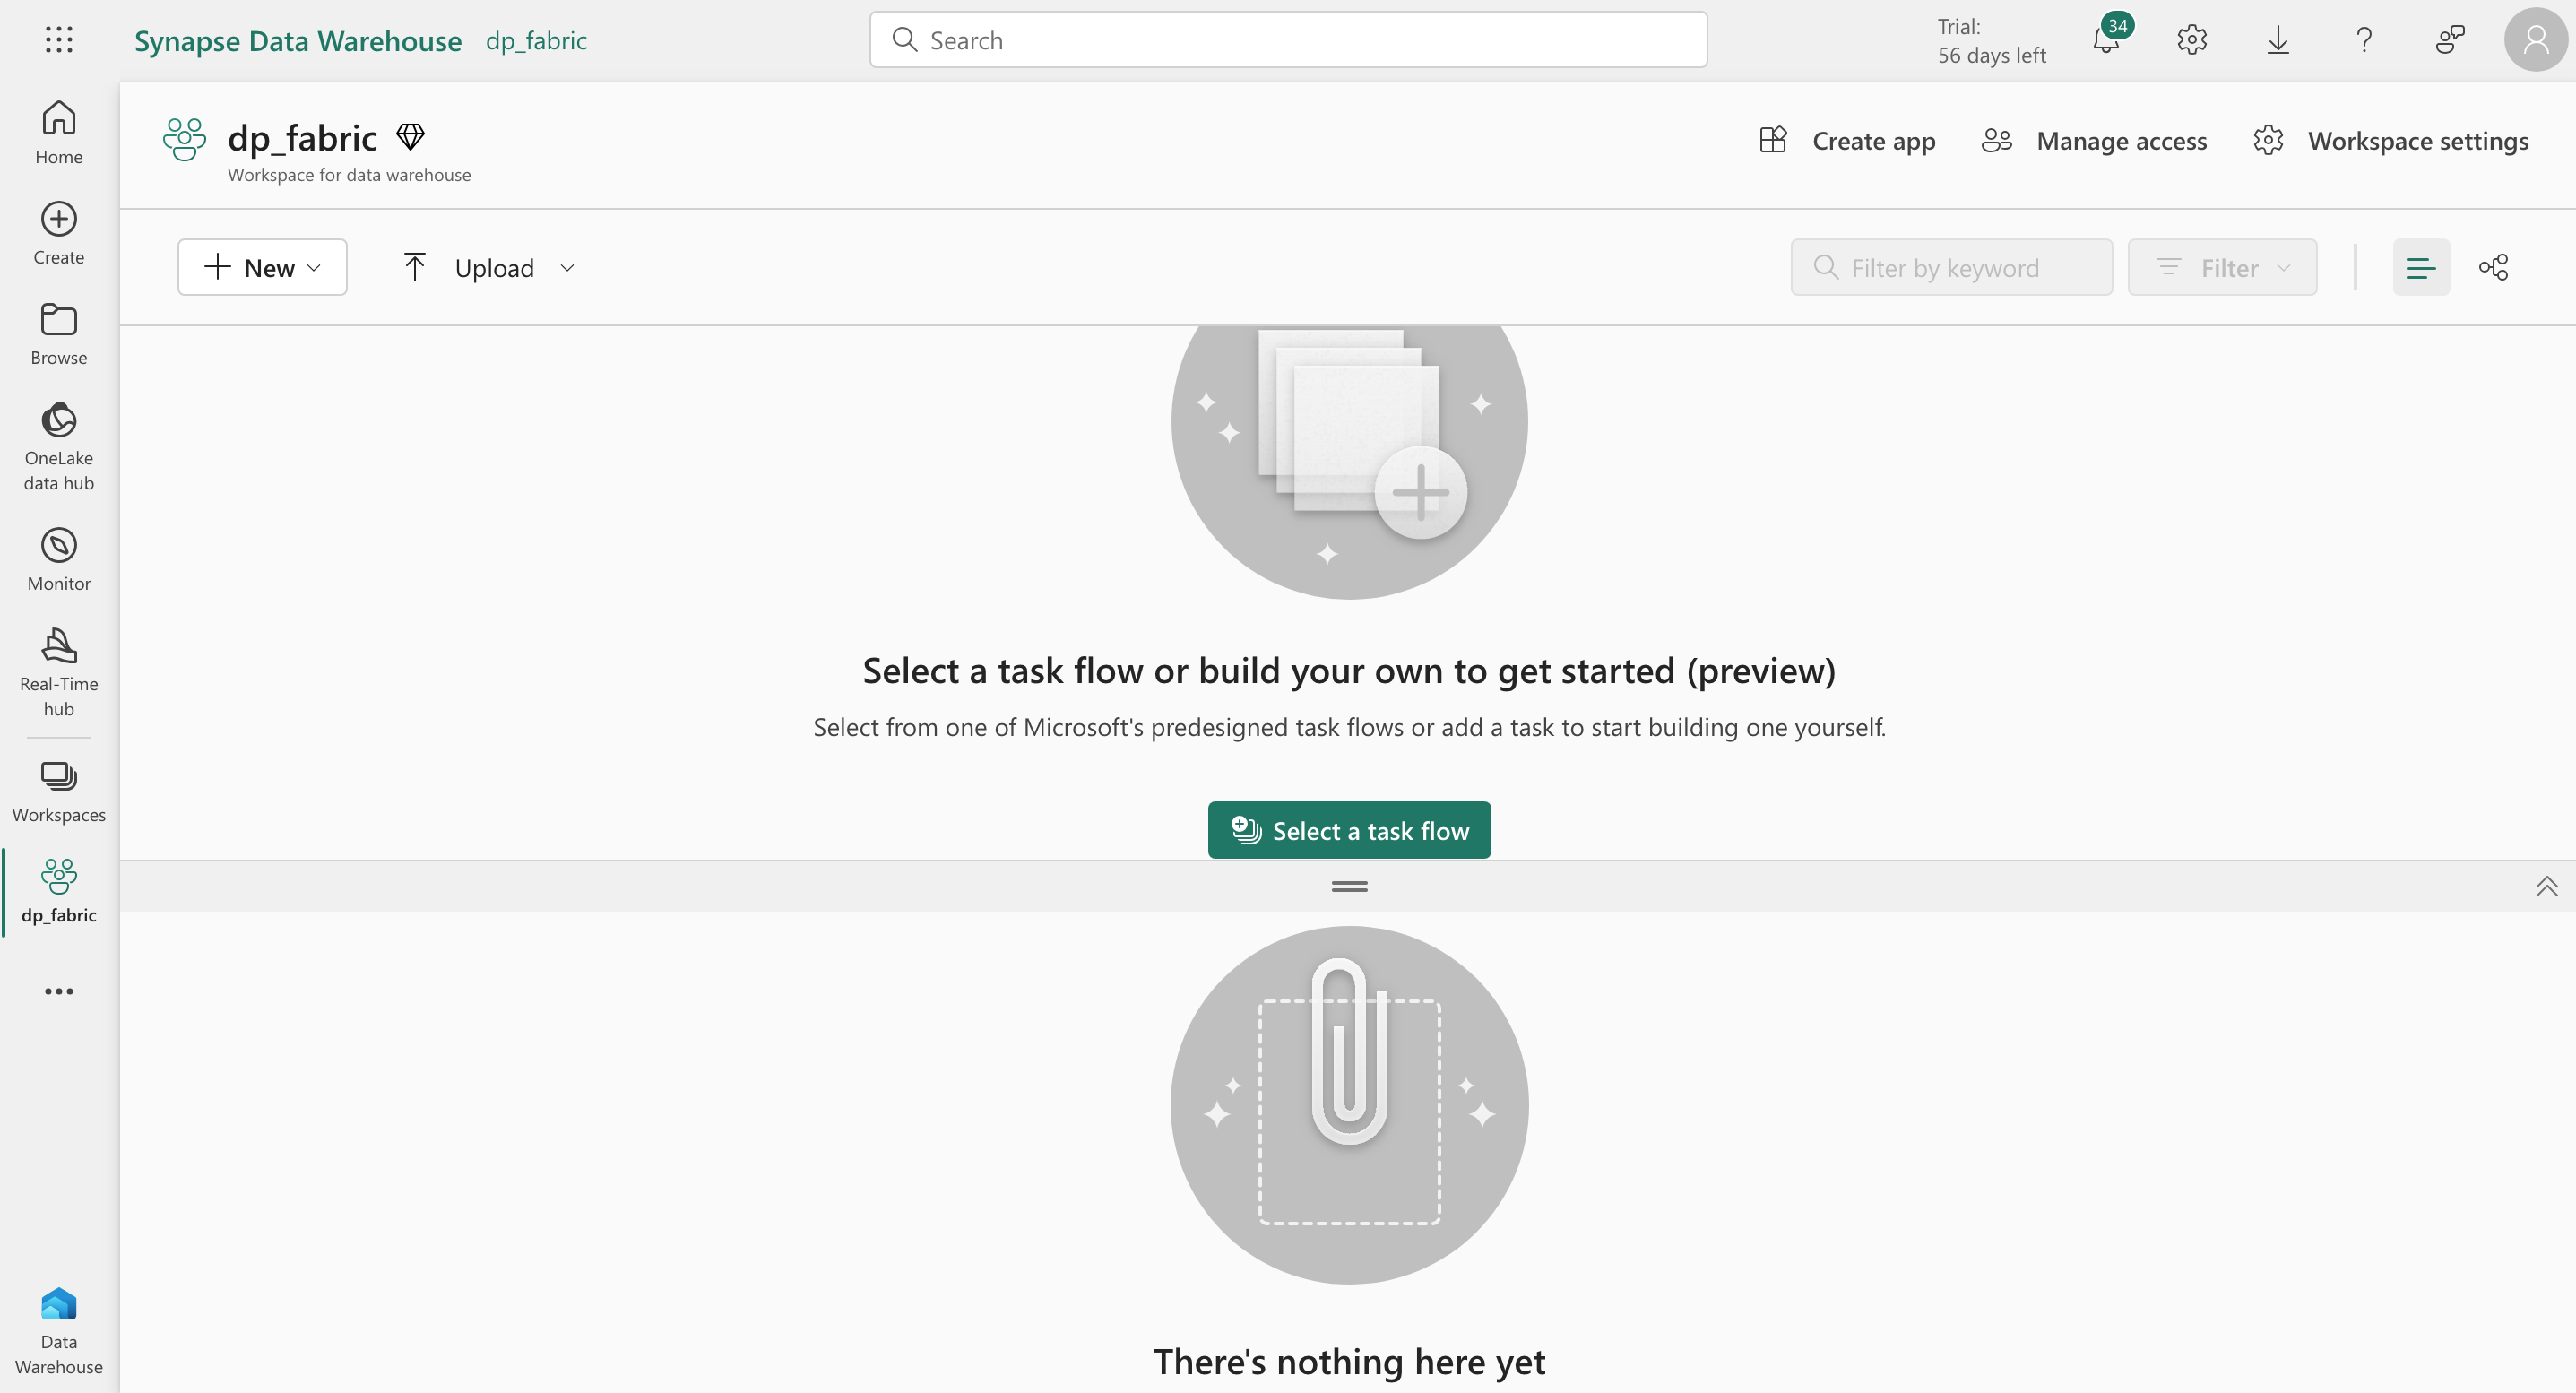
3. Create a new workspace with a name of your choice, selecting a licensing mode that includes Fabric capacity (Trial, Premium, or Fabric).
4. When your new workspace opens, it should be empty.

## Create a data warehouse
Now that you have a workspace, it’s time to create a data warehouse. The Synapse Data Warehouse home page includes a shortcut to create a new warehouse:

1. In the **Synapse Data Warehouse** home page, create a new **Warehouse** with a name of your choice.
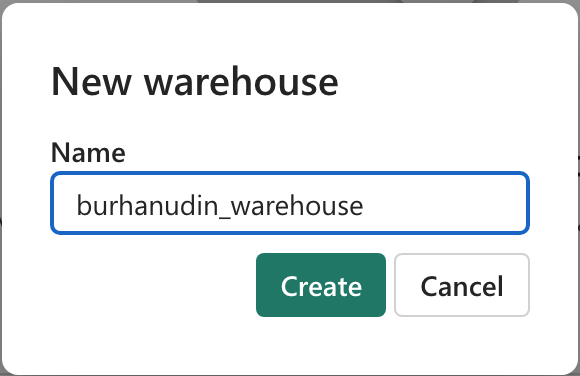
After a minute or so, a new warehouse will be created:
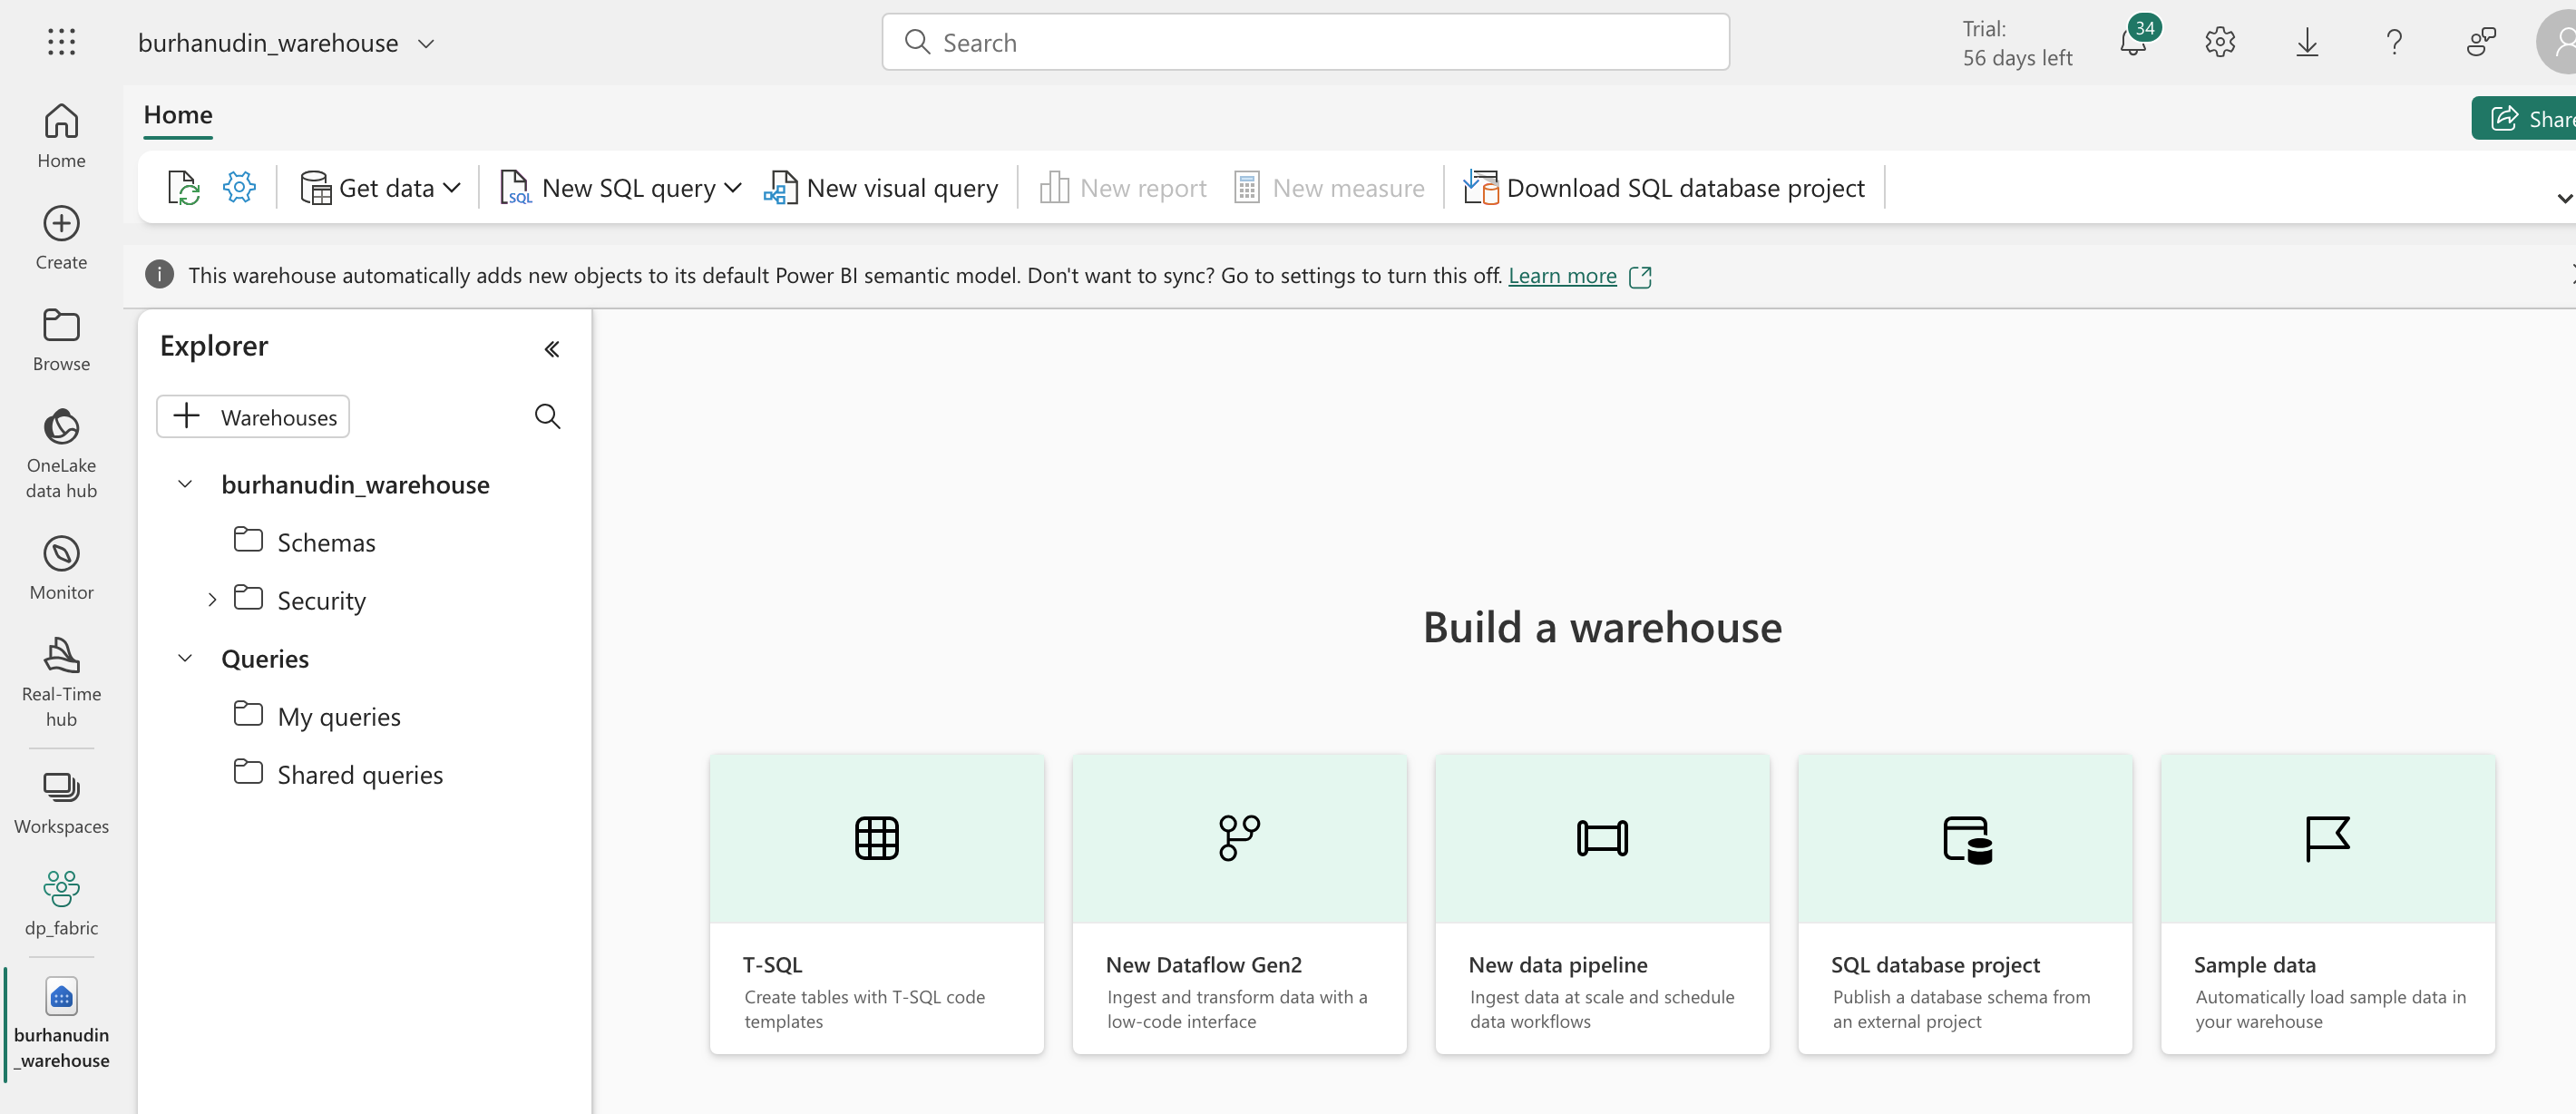

### Create tables and insert data
A warehouse is a relational database in which you can define tables and other objects.

1. In your new warehouse, select the **Create tables with T-SQL** tile, and replace the default SQL code with the following CREATE TABLE statement:
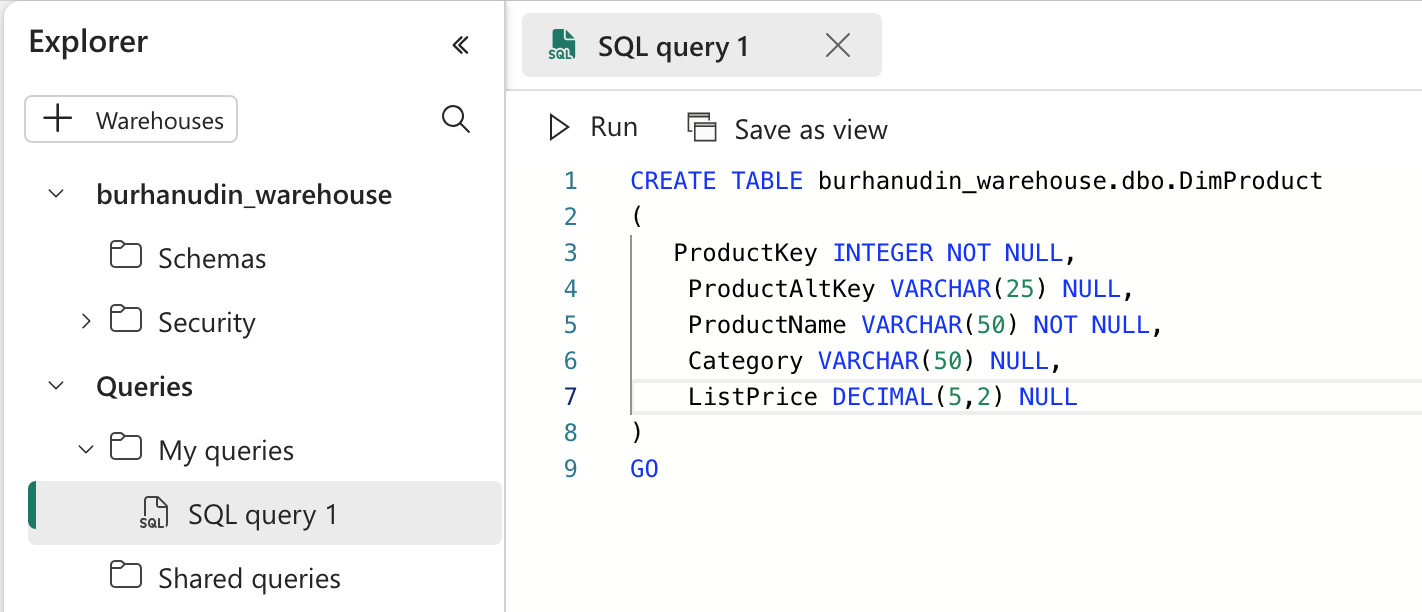
2. Use the ▷ **Run** button to run the SQL script, which creates a new table named **DimProduct** in the **dbo** schema of the data warehouse.

3. Use the **Refresh** button on the toolbar to refresh the view. Then, in the **Explorer** pane, expand **Schemas > dbo > Tables** and verify that the **DimProduct** table has been created.

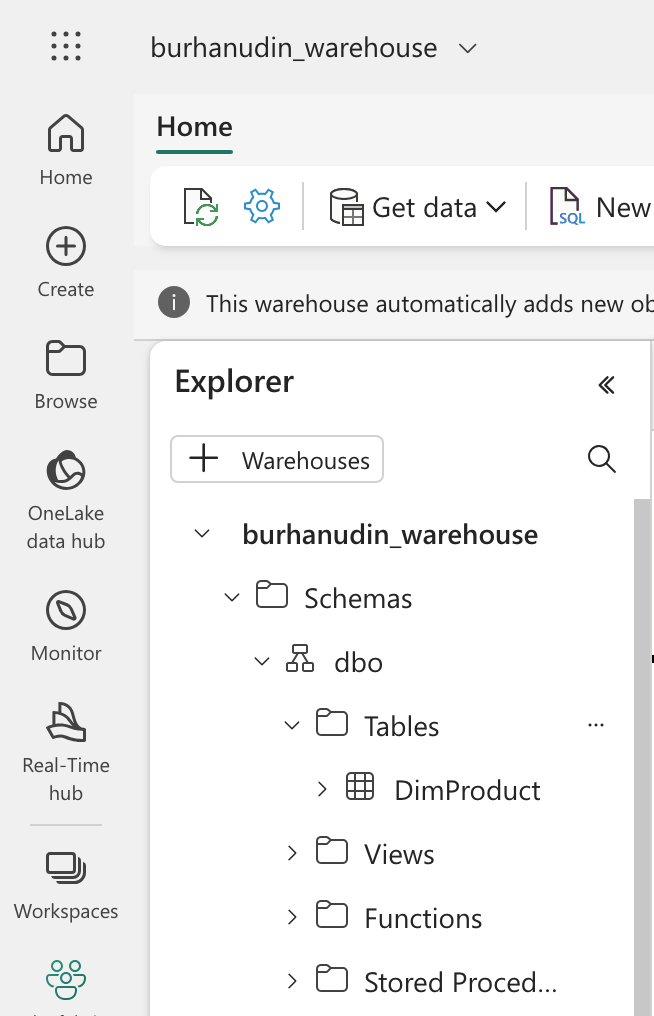
4. On the **Home** menu tab, use the **New SQL Query** button to create a new query, and enter the following INSERT statement:

5. Run the new query to insert three rows into the **DimProduct** table.
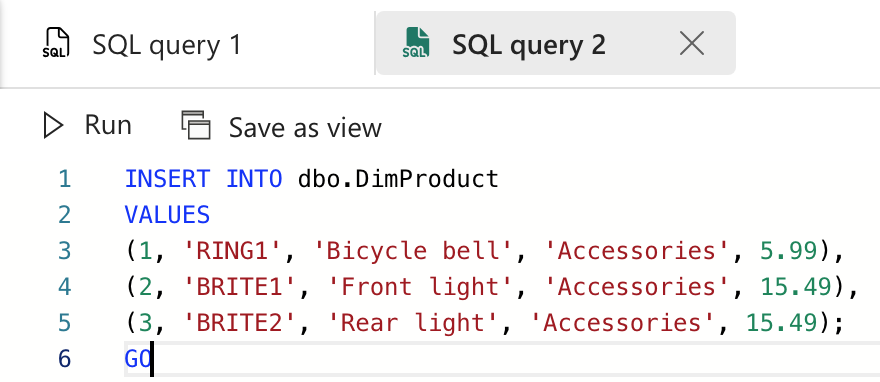
6. When the query has finished, select the **Data** tab at the bottom of the page in the data warehouse. In the **Explorer** pane, select the **DimProduct** table and verify that the three rows have been added to the table.
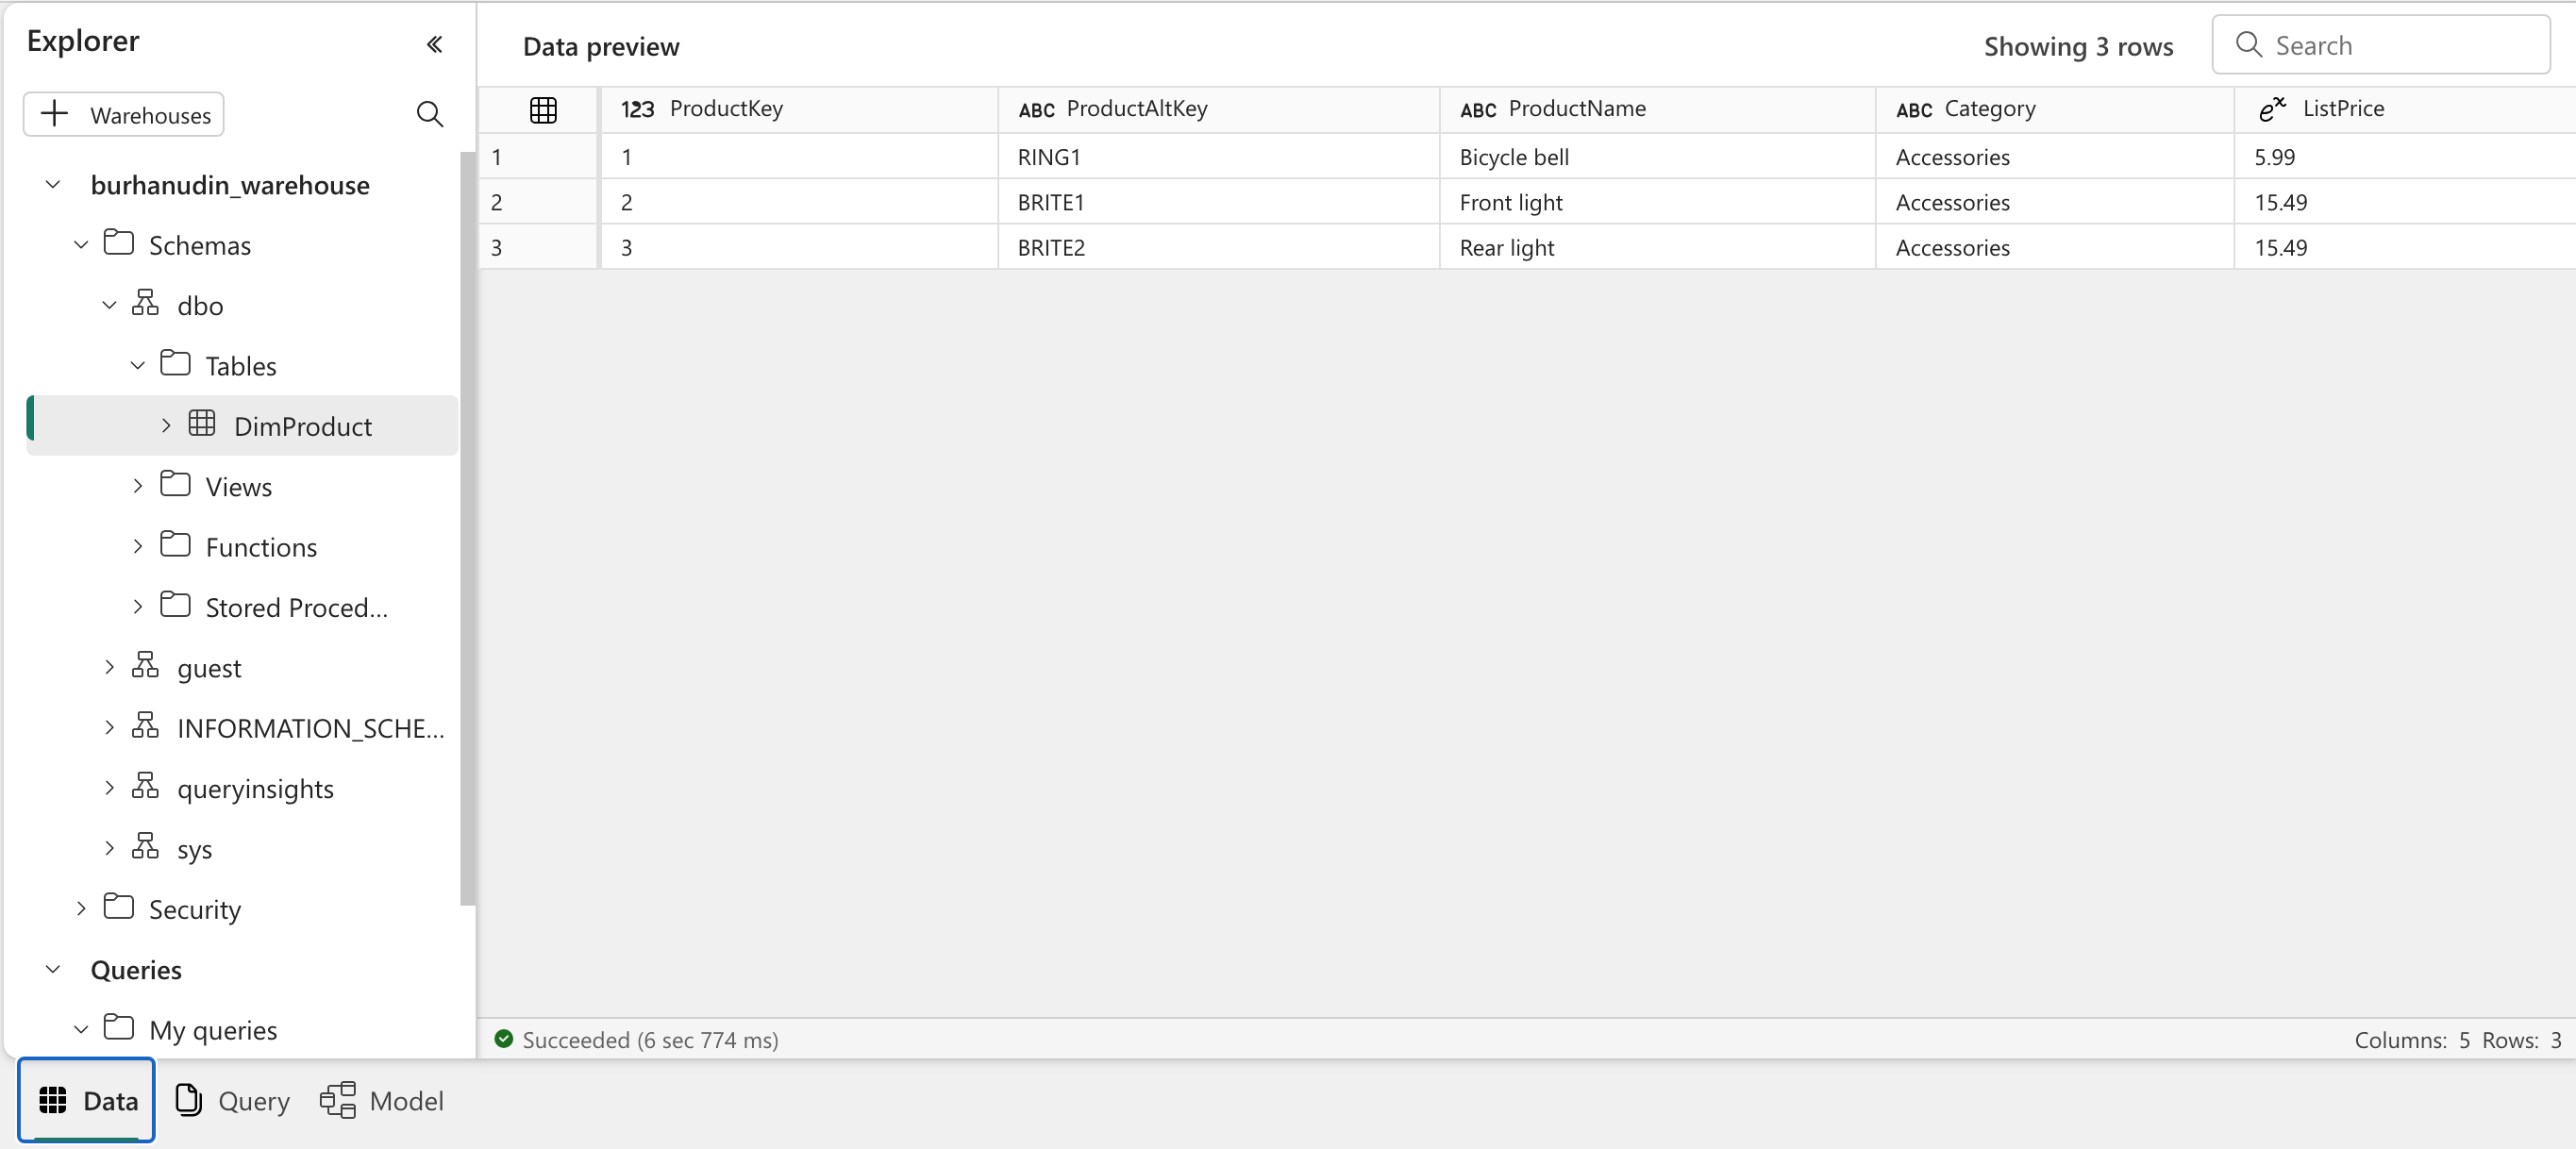
7. On the **Home** menu tab, use the **New SQL Query** button to create a new query. Then copy and paste the Transact-SQL code from https://raw.githubusercontent.com/MicrosoftLearning/dp-data/main/create-dw.txt into the new query pane.

8. Run the query, which creates a simple data warehouse schema and loads some data. The script should take around 30 seconds to run.
9. Use the **Refresh** button on the toolbar to refresh the view. Then in the **Explorer** pane, verify that the **dbo** schema in the data warehouse now contains the following four tables:
    + DimCustomer
    + DimDate
    + DimProduct
    + FactSalesOrder
> Tip: If the schema takes a while to load, just refresh the browser page.
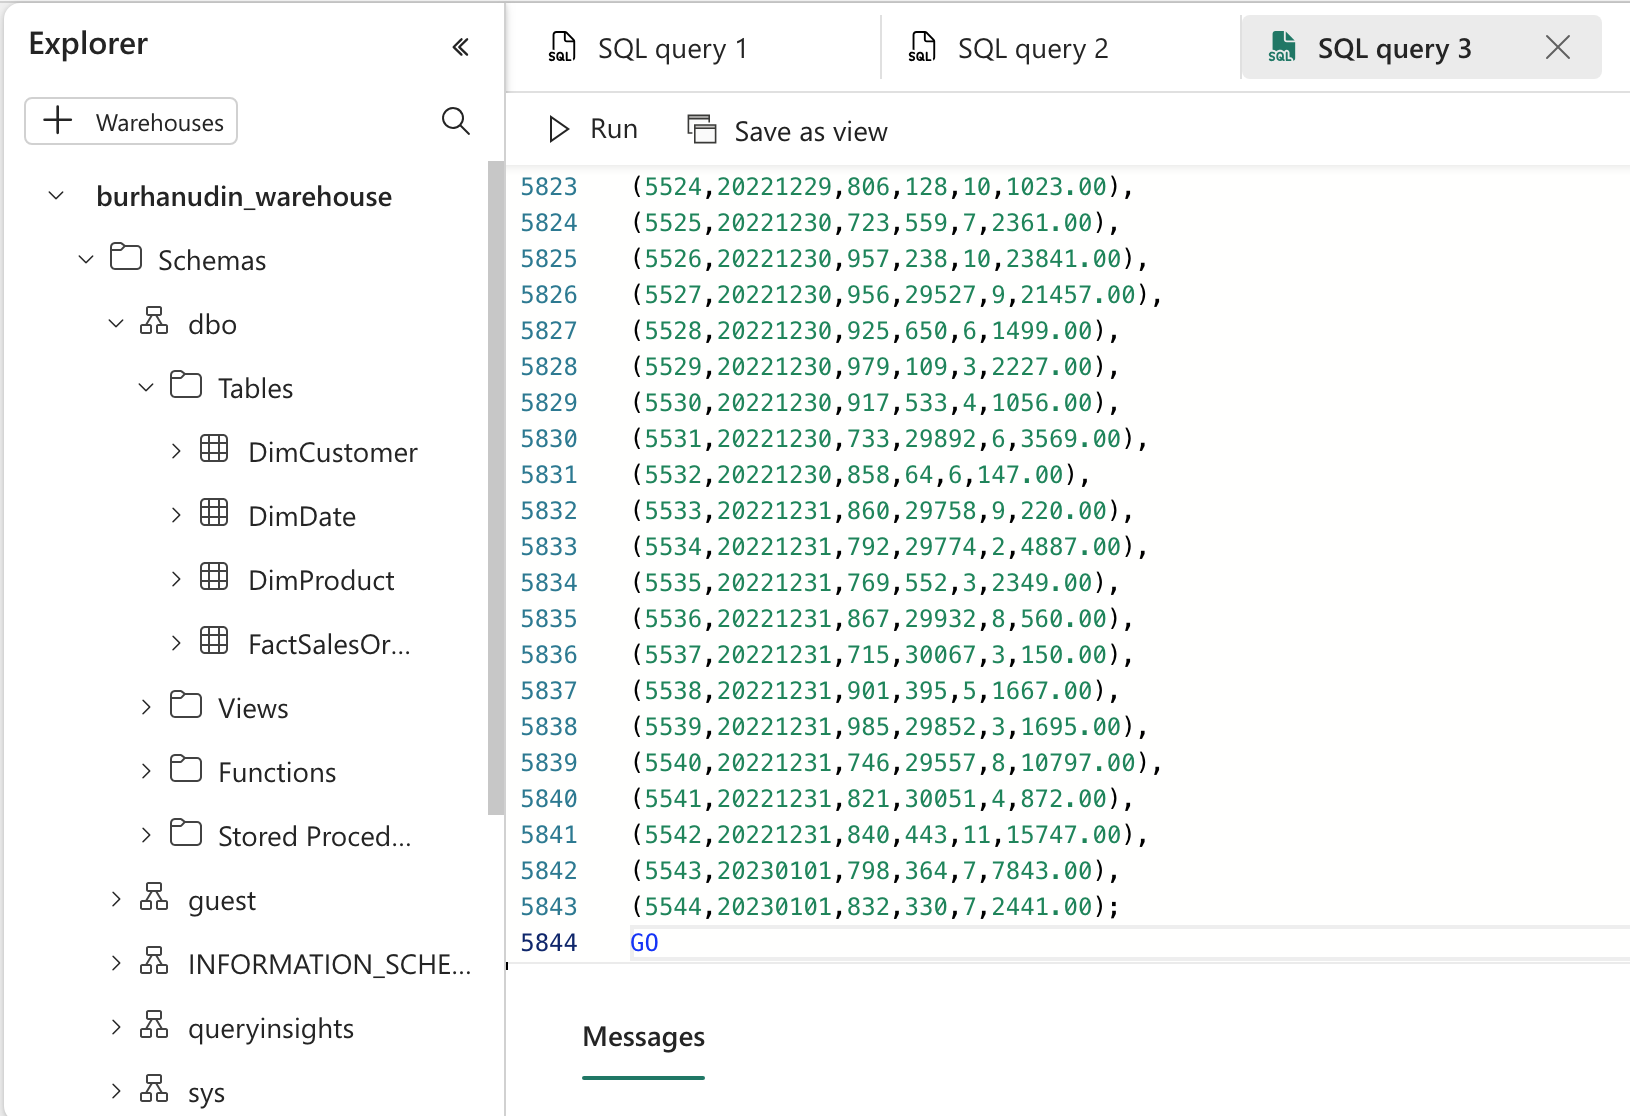
### Define a data model
A relational data warehouse typically consists of fact and dimension tables. The fact tables contain numeric measures you can aggregate to analyze business performance (for example, sales revenue), and the dimension tables contain attributes of the entities by which you can aggregate the data (for example, product, customer, or time). In a Microsoft Fabric data warehouse, you can use these keys to define a data model that encapsulates the relationships between the tables.

1. At the bottom of the page in the data warehouse, select the **Model** tab.
2. In the model pane, rearrange the tables in your data warehouse so that the **FactSalesOrder** table is in the middle, like this:
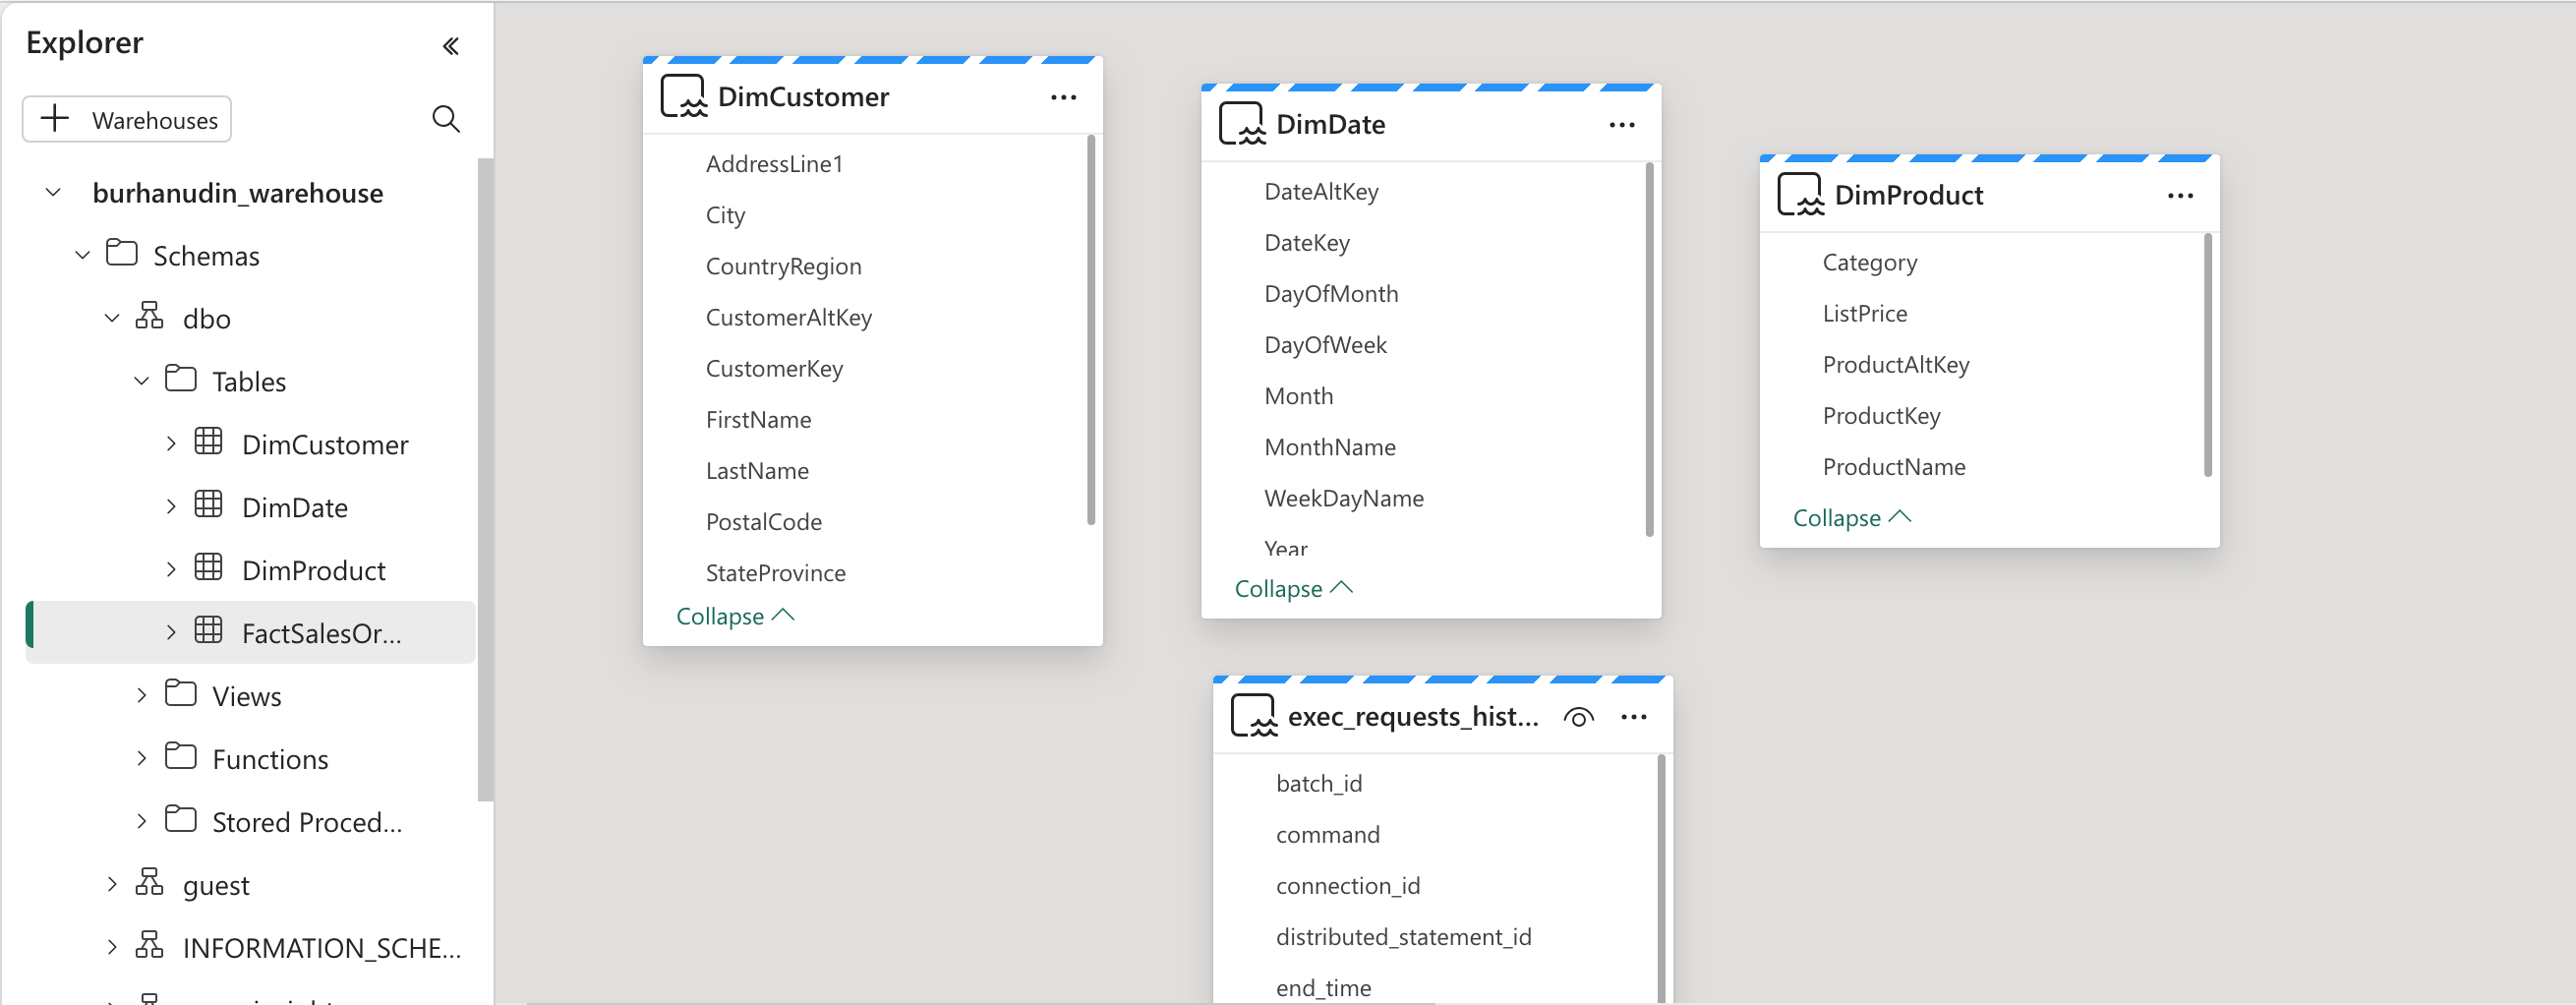
3. Drag the **ProductKey** field from the **FactSalesOrder** table and drop it on the **ProductKey** field in the **DimProduct** table. Then confirm the following relationship details:
+ **Table 1**: FactSalesOrder
+ **Column**: ProductKey
+ **Table 2**: DimProduct
+ **Column**: ProductKey
+ **Cardinality**: Many to one (*:1)
+ **Cross filter direction**: Single
+ **Make this relationship active**: Selected
+ **Assume referential integrity**: Unselected
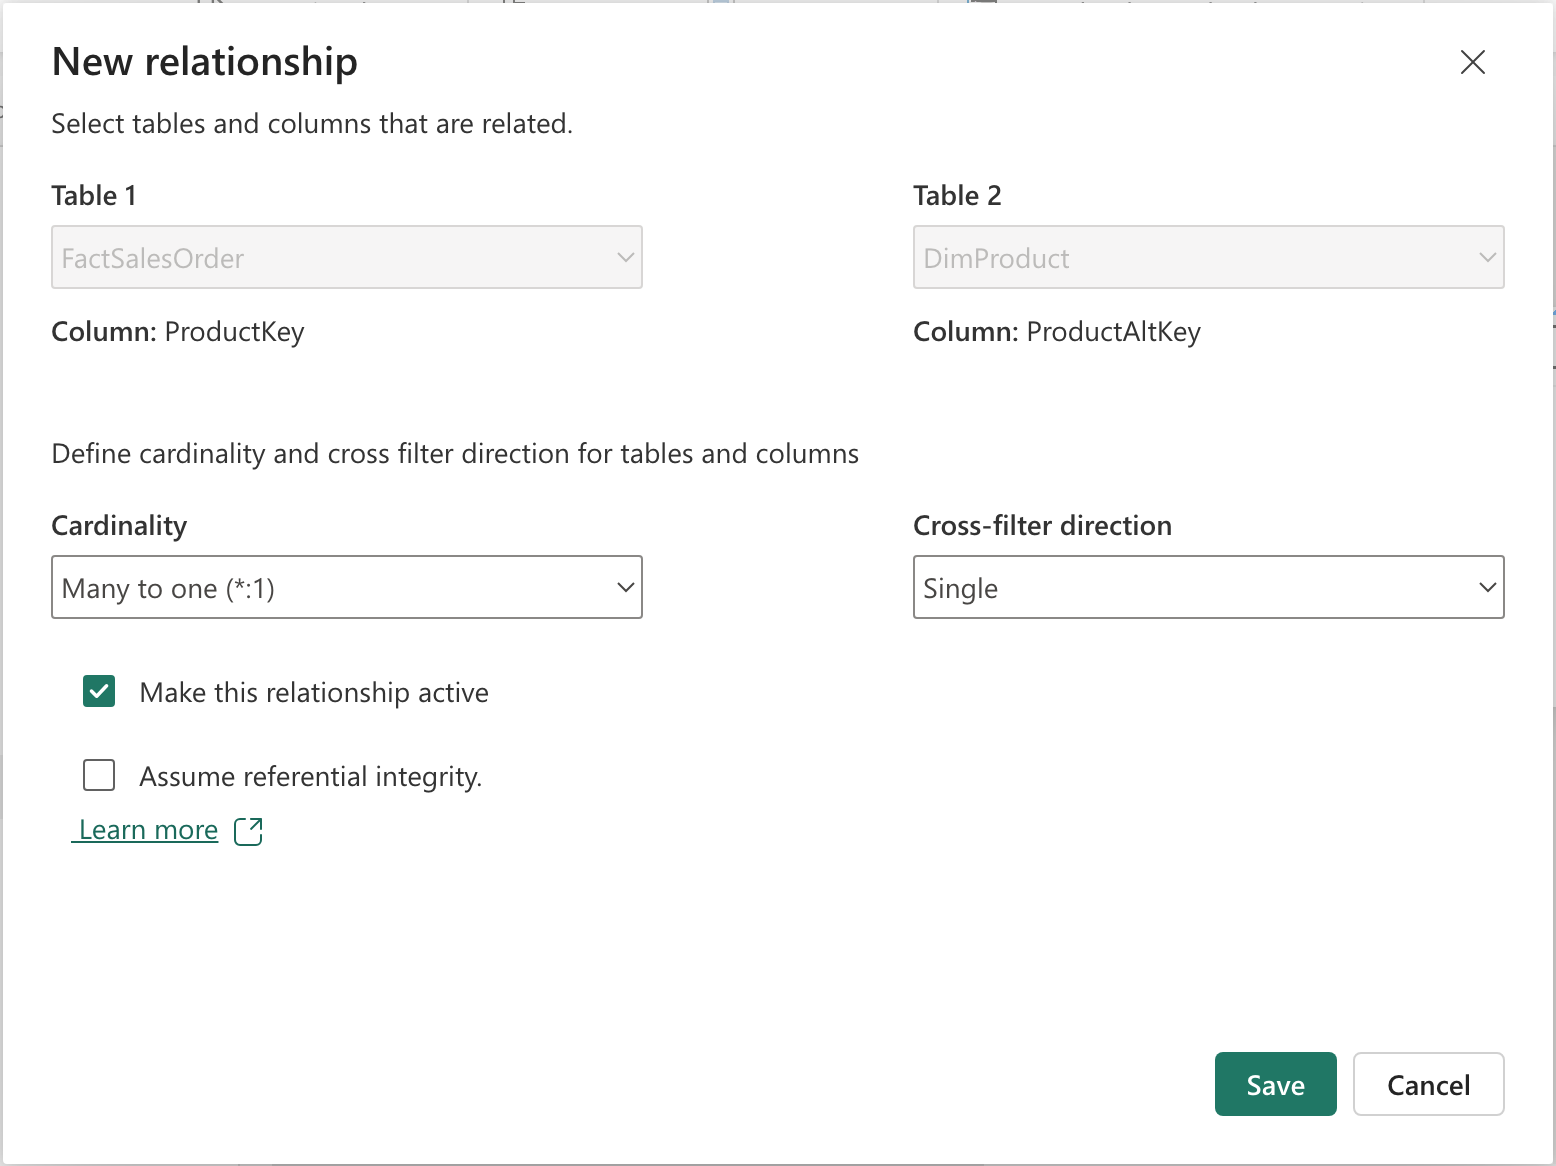
4. Repeat the process to create many-to-one relationships between the following tables:
+ FactSalesOrder.CustomerKey → DimCustomer.CustomerKey
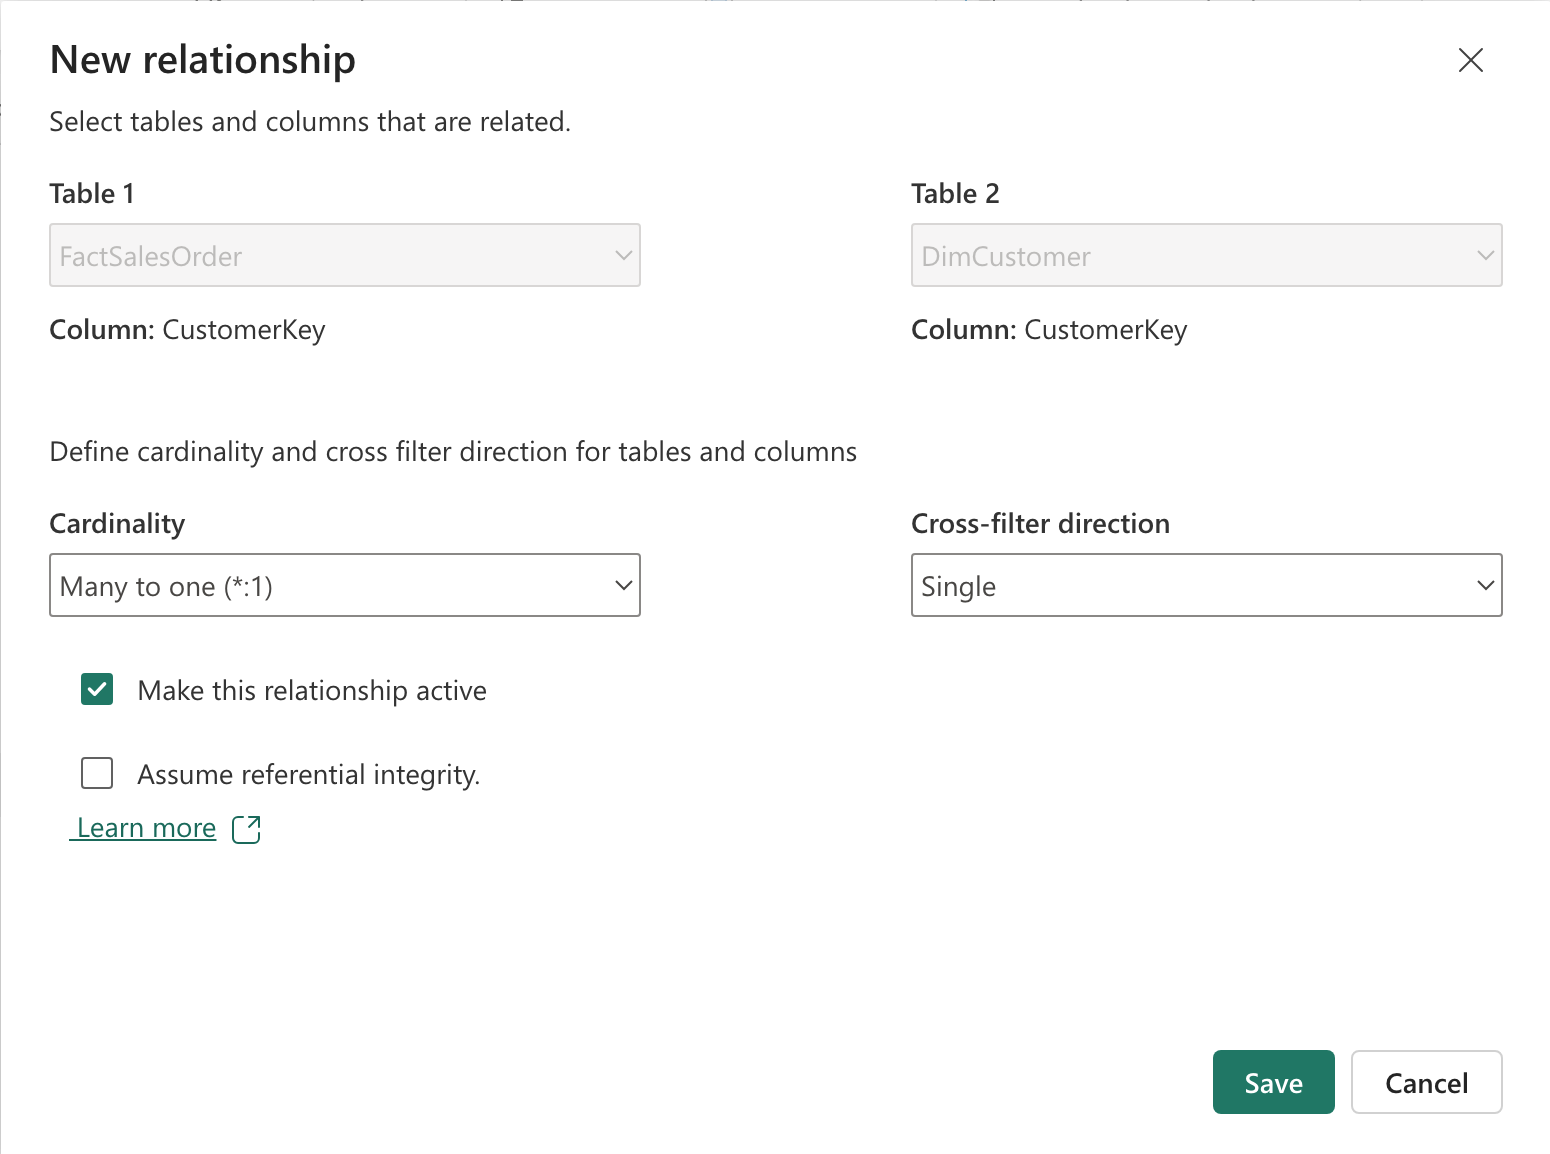
+ FactSalesOrder.SalesOrderDateKey → DimDate.DateKey
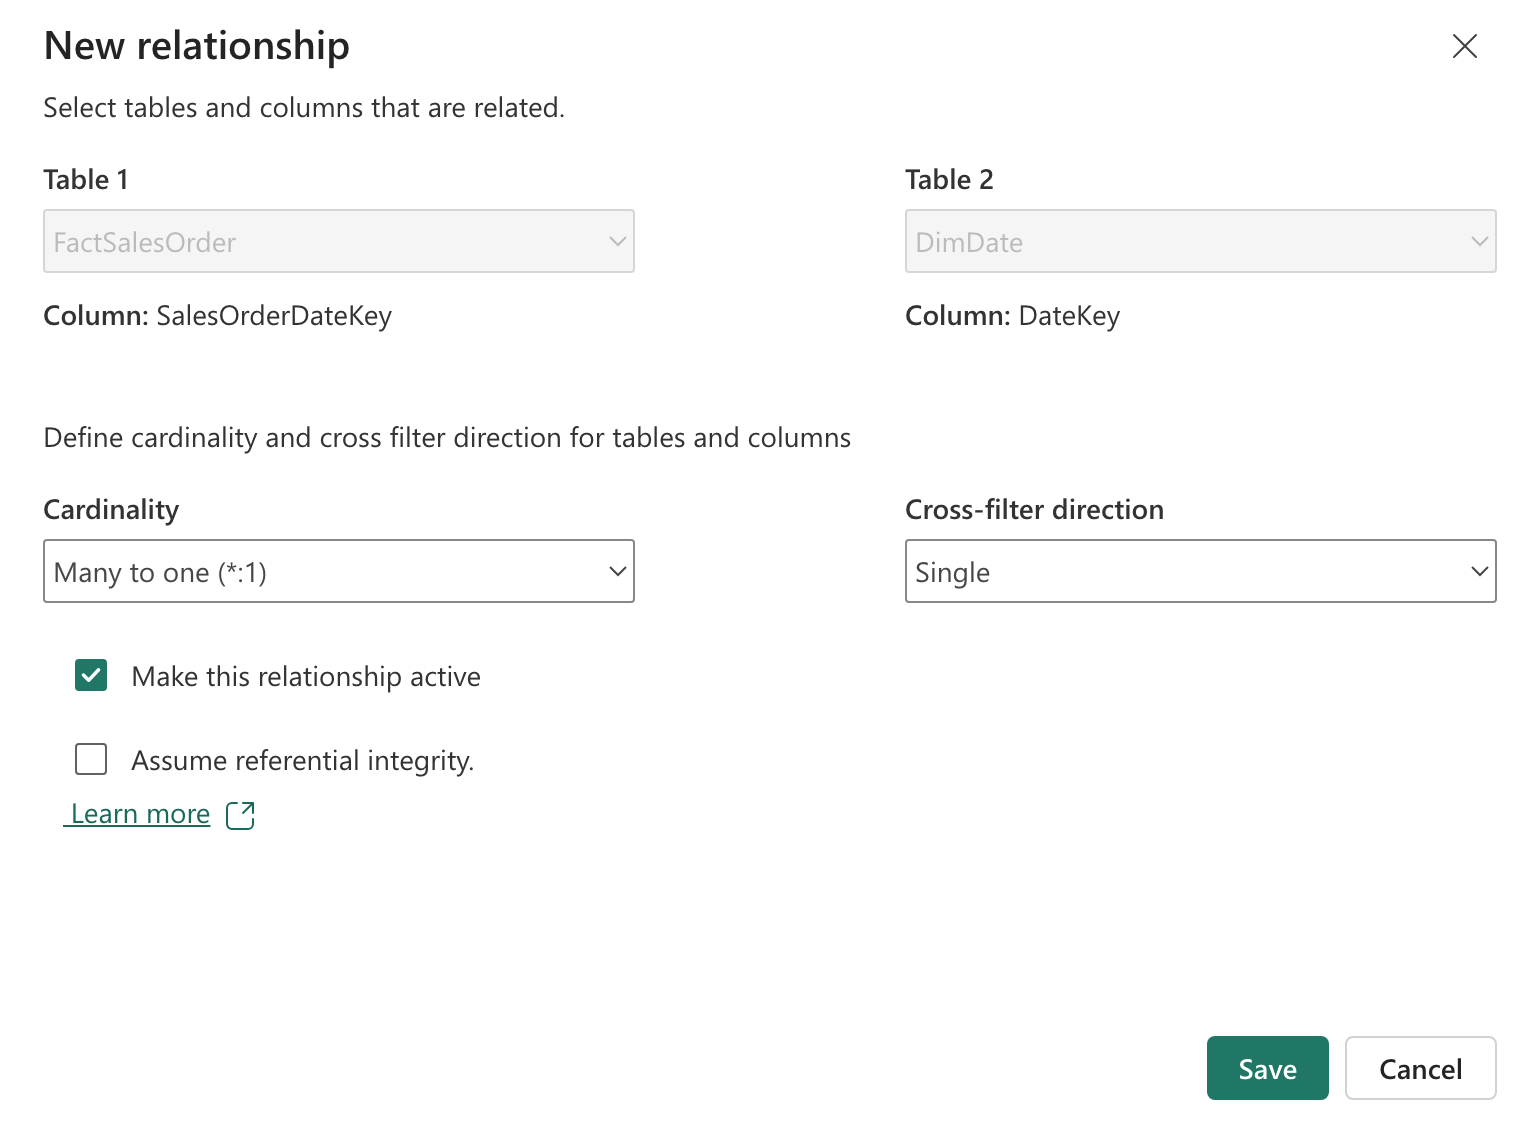
When all of the relationships have been defined, the model should look like this:
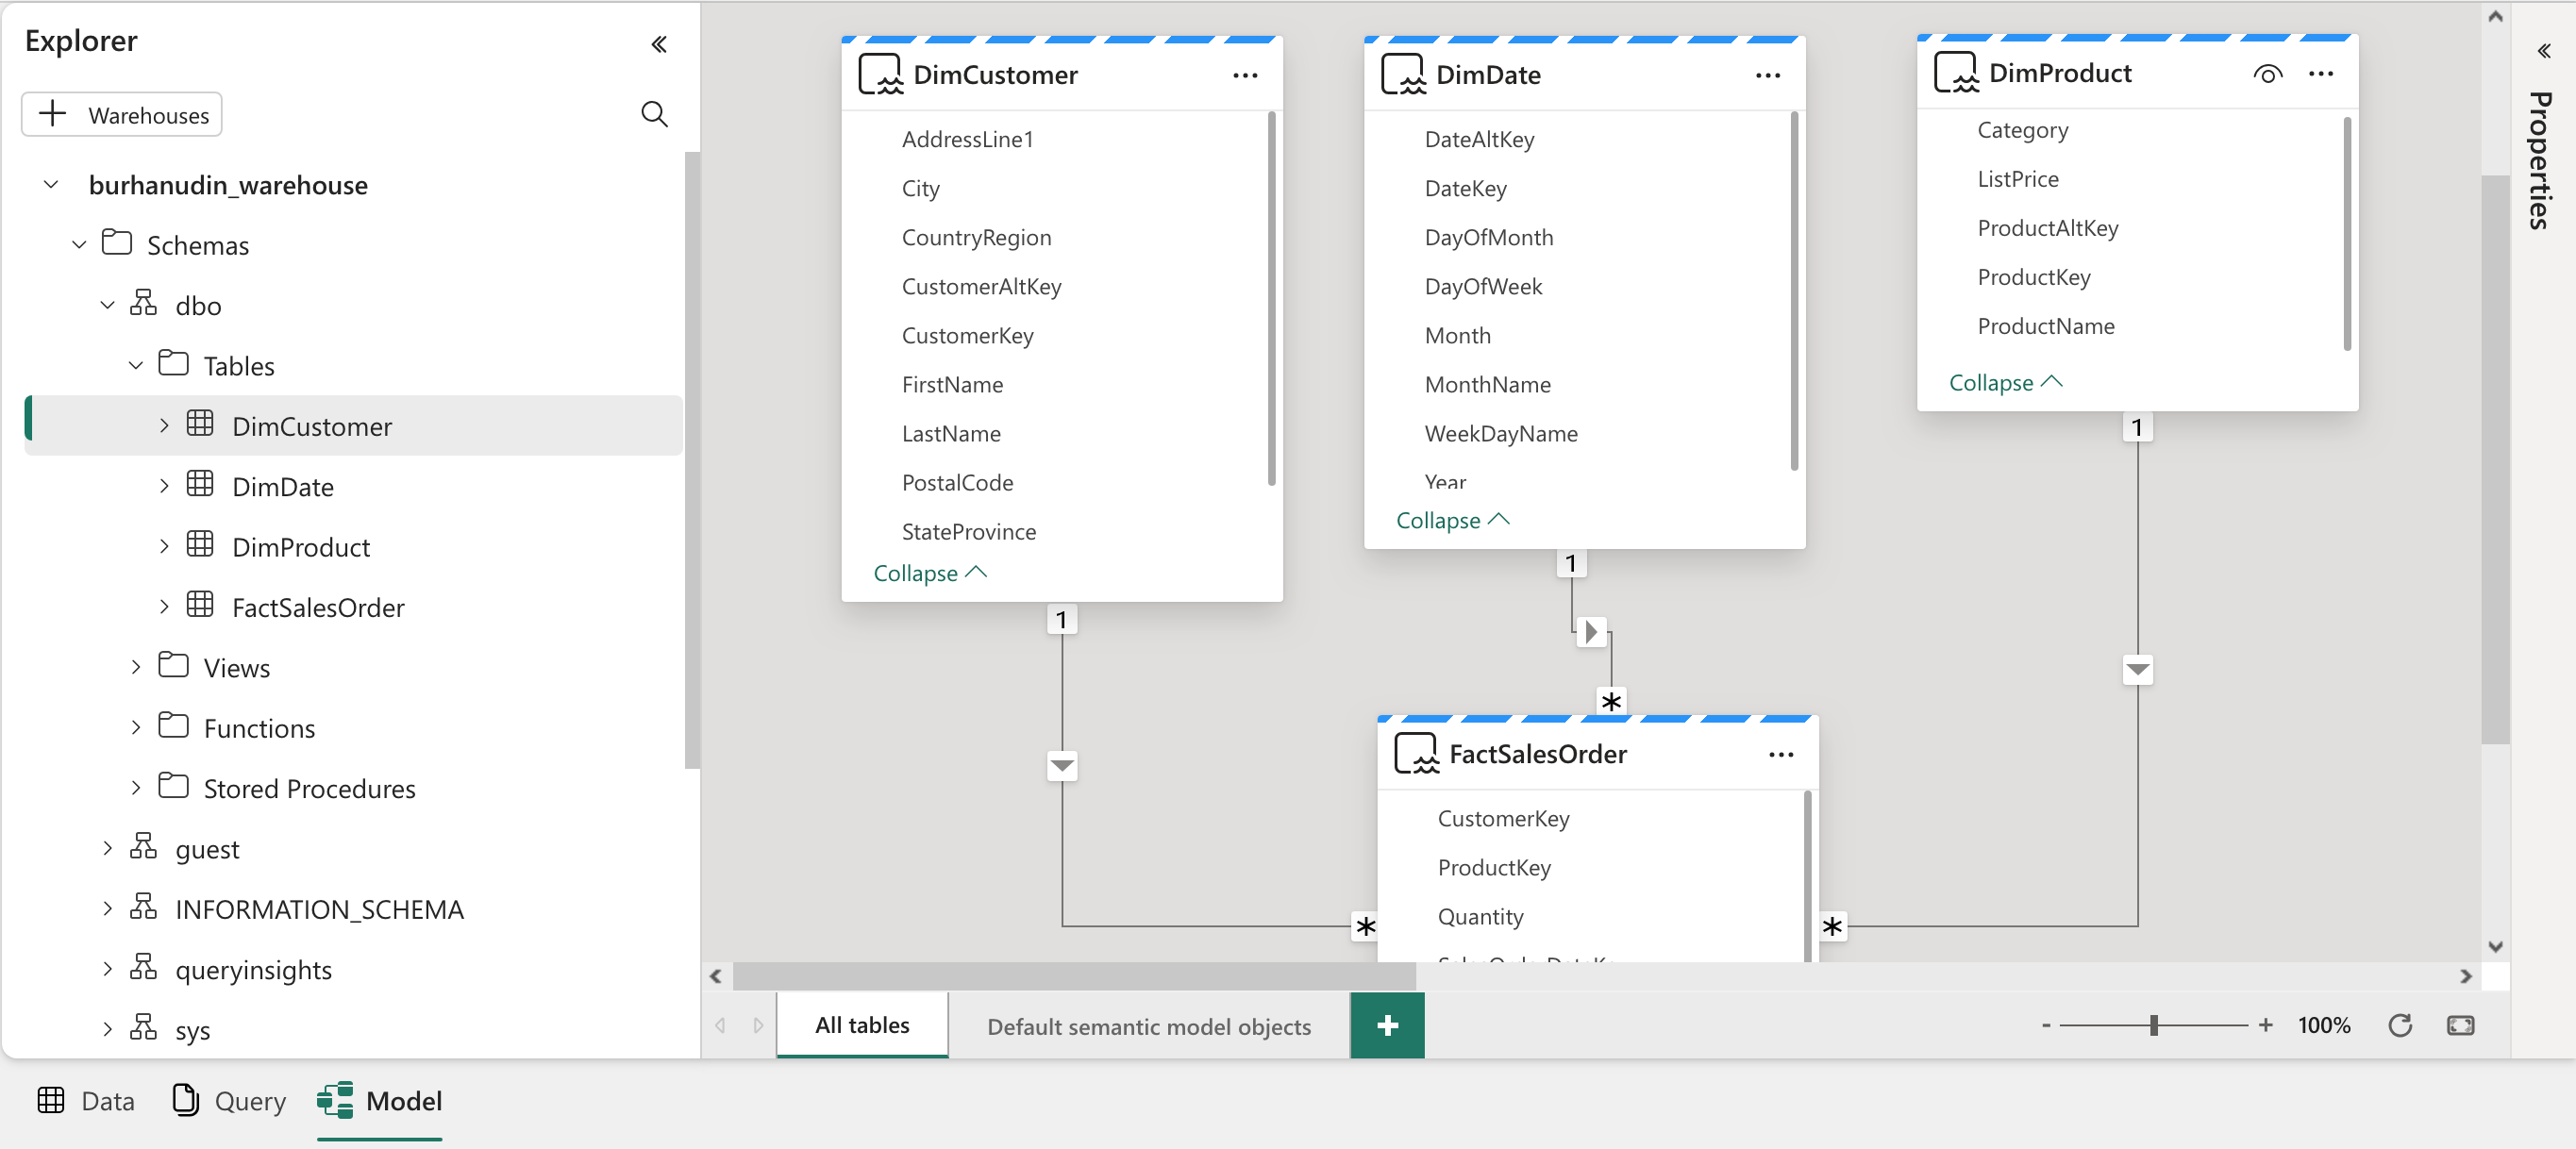

### Query data warehouse tables
Since the data warehouse is a relational database, you can use SQL to query its tables.

#### Query fact and dimension tables
Most queries in a relational data warehouse involve aggregating and grouping data (using aggregate functions and GROUP BY clauses) across related tables (using JOIN clauses).

1. Create a new SQL Query, and run the following code:

Note that the attributes in the time dimension enable you to aggregate the measures in the fact table at multiple hierarchical levels - in this case, year and month. This is a common pattern in data warehouses.
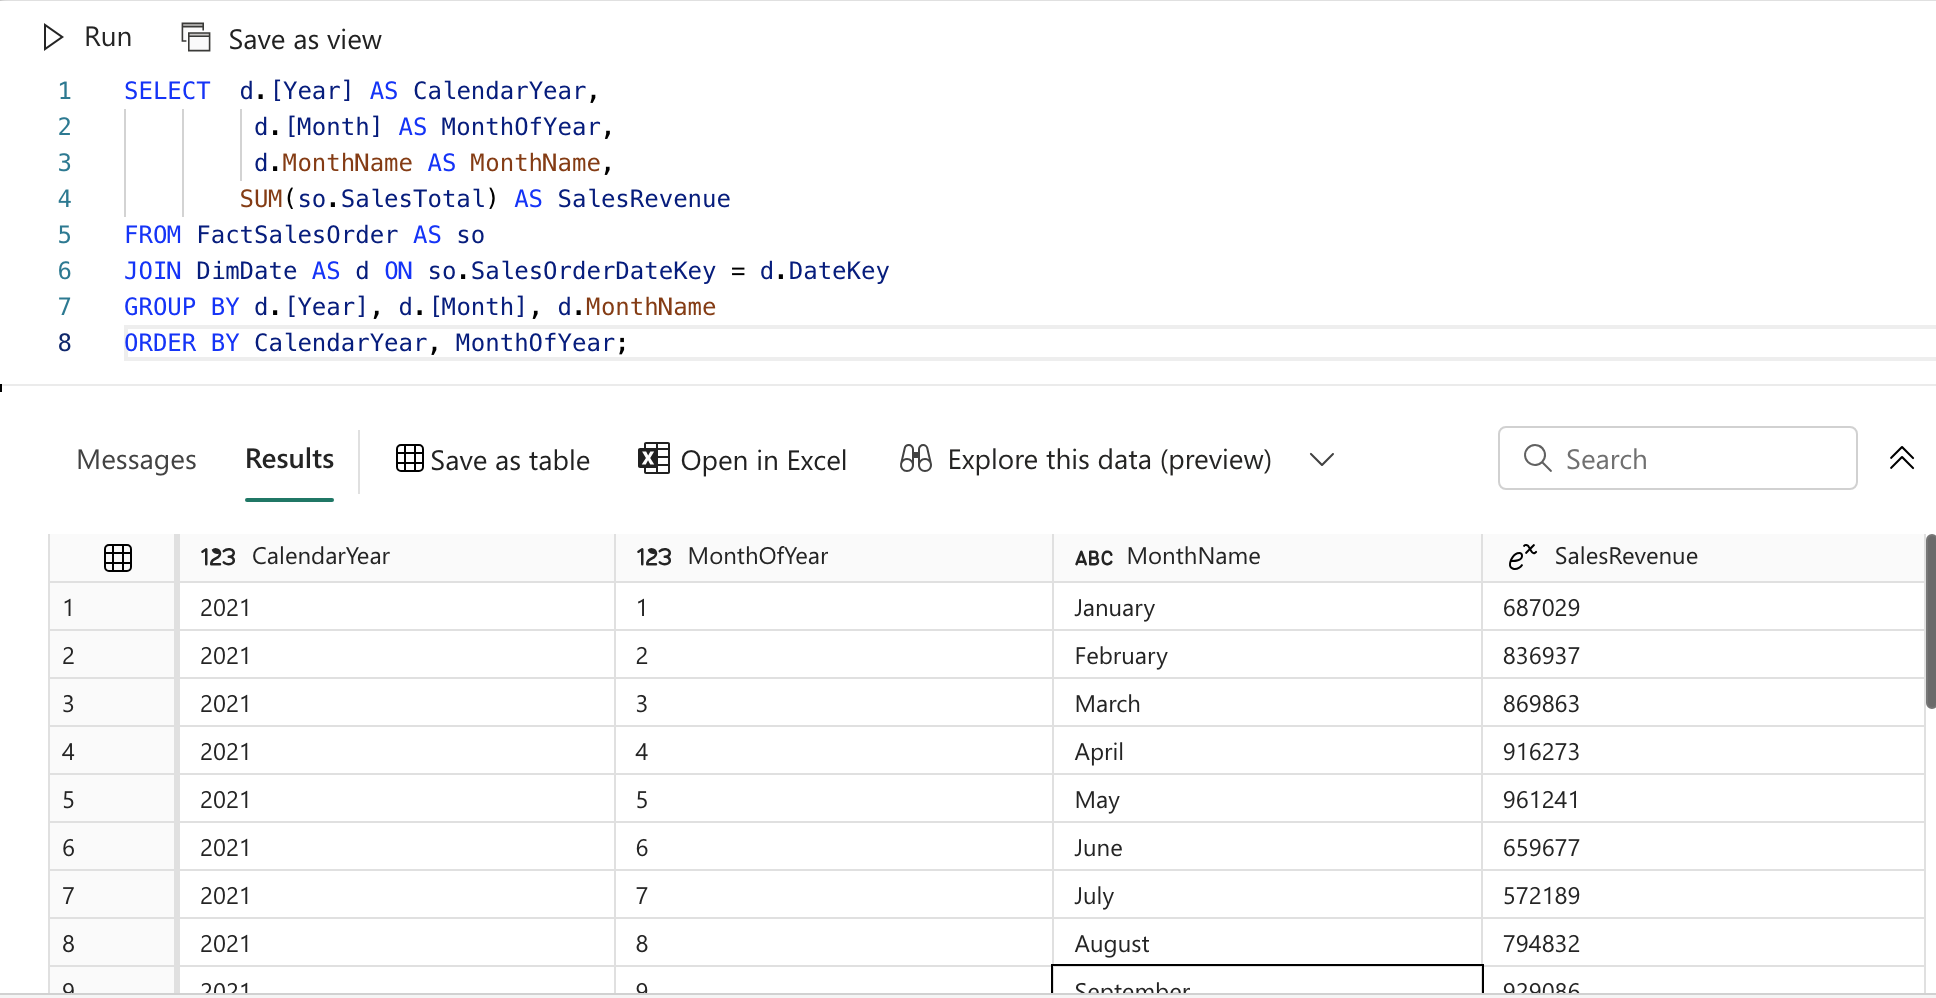
2. Modify the query as follows to add a second dimension to the aggregation.

3. Run the modified query and review the results, which now include sales revenue aggregated by year, month, and sales region.
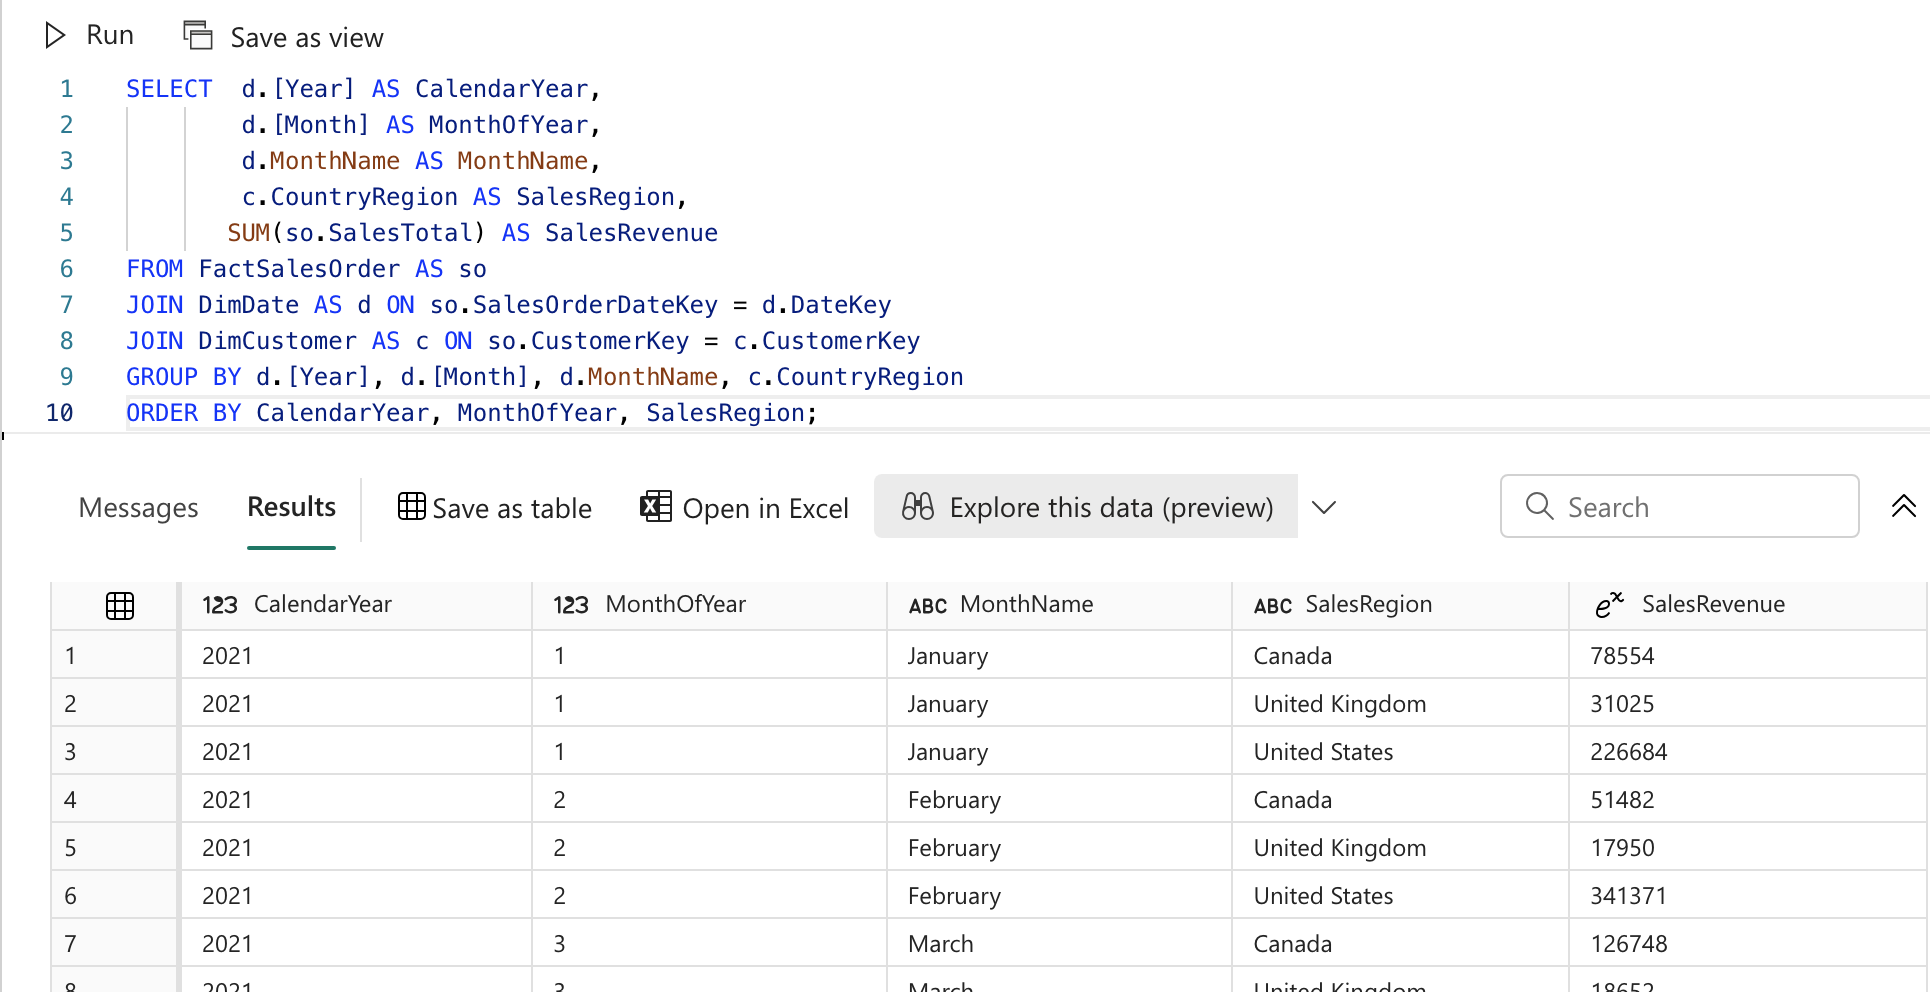

### Create a view
A data warehouse in Microsoft Fabric has many of the same capabilities you may be used to in relational databases. For example, you can create database objects like views and stored procedures to encapsulate SQL logic.

1. Modify the query you created previously as follows to create a view (note that you need to remove the ORDER BY clause to create a view).

2. Run the query to create the view. Then refresh the data warehouse schema and verify that the new view is listed in the **Explorer** pane.
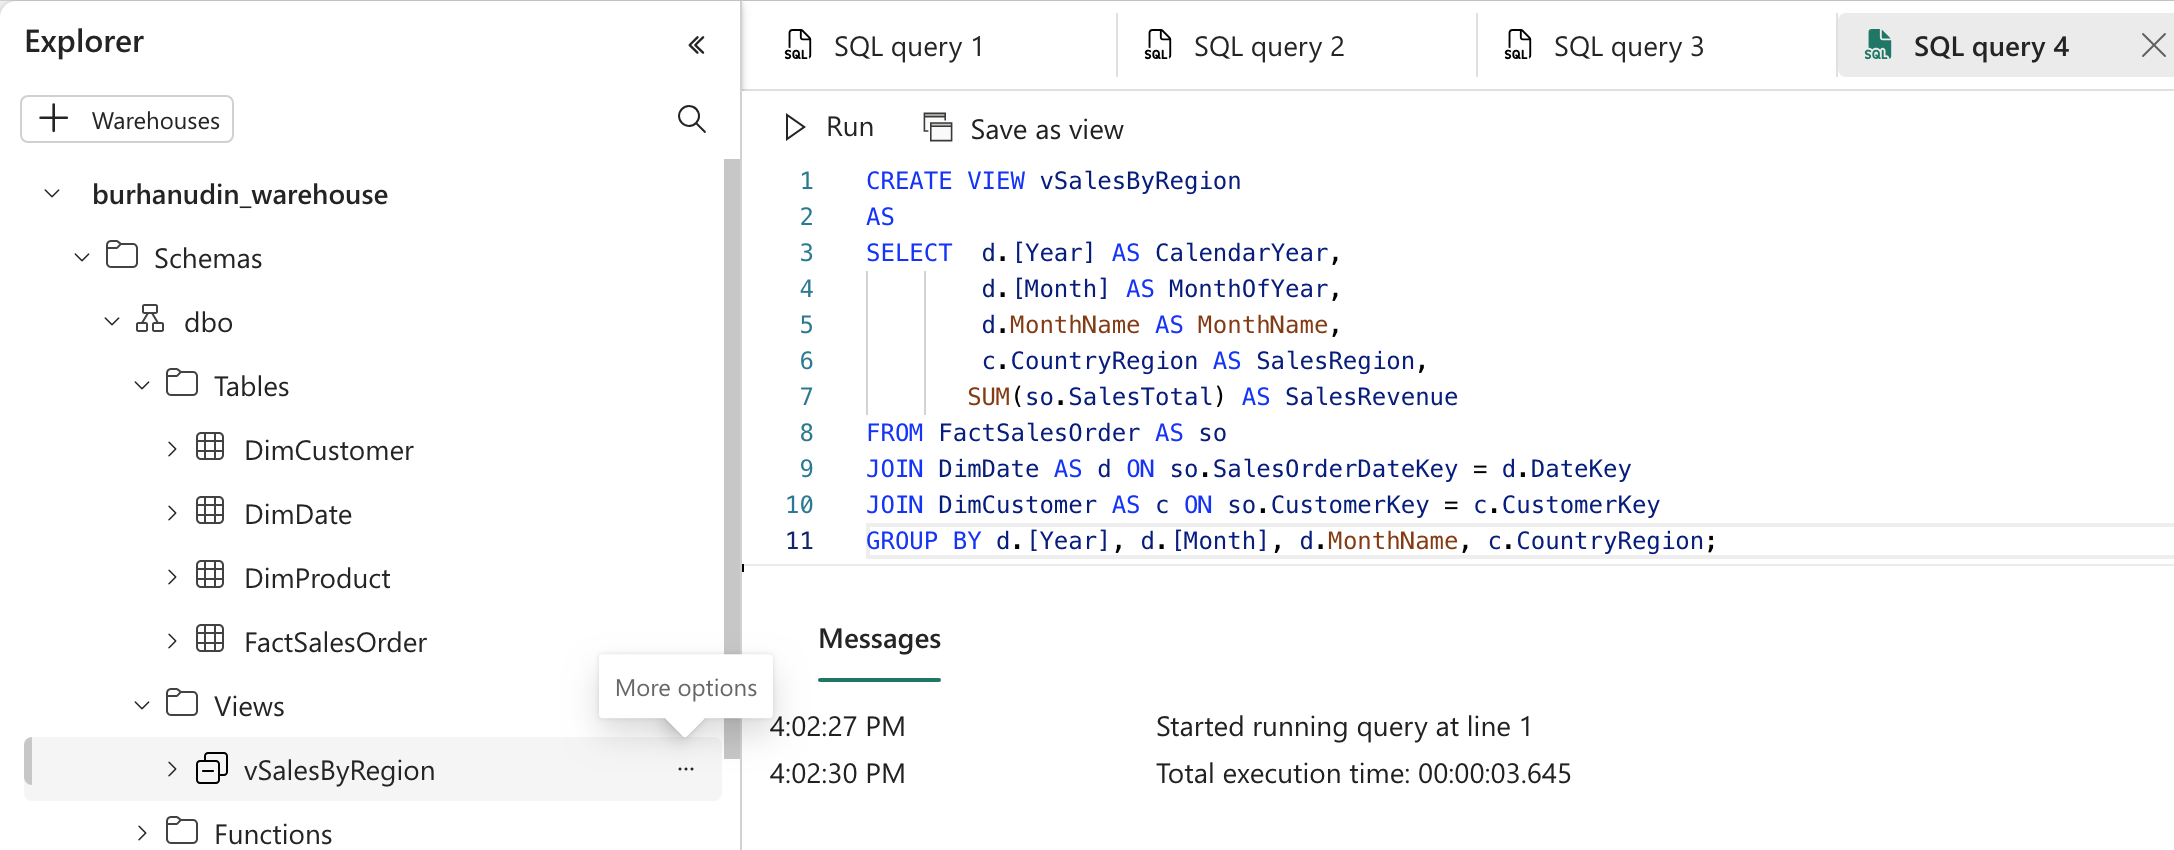
3. Create a new SQL query and run the following SELECT statement:

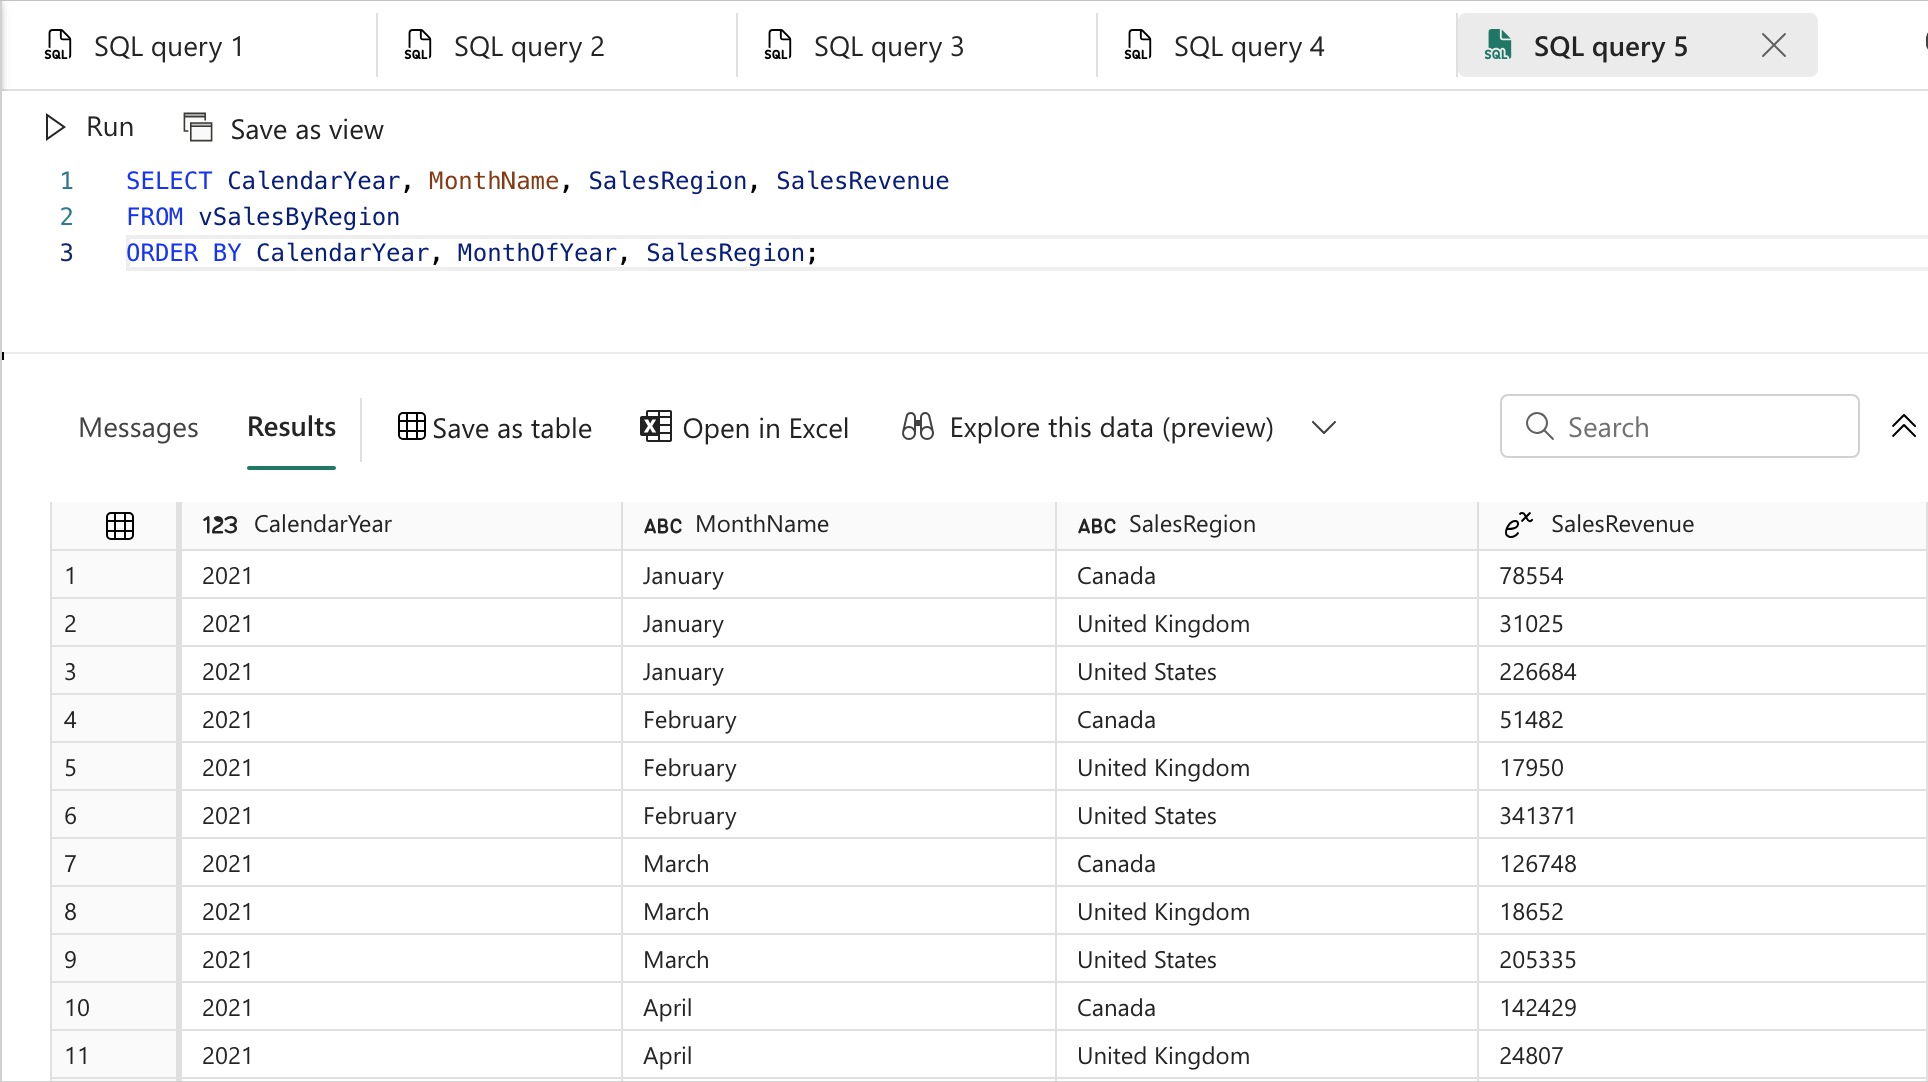

#### Create a visual query
Instead of writing SQL code, you can use the graphical query designer to query the tables in your data warehouse. This experience is similar to Power Query online, where you can create data transformation steps with no code. For more complex tasks, you can use Power Query’s M (Mashup) language.

1. On the **Home** menu, select **New visual query**.

2. Drag **FactSalesOrder** onto the **canvas**. Notice that a preview of the table is displayed in the **Preview** pane below.

3. Drag **DimProduct** onto the **canvas**. We now have two tables in our query.

4. Use the **(+)** button on the **FactSalesOrder** table on the canvas to **Merge queries**.

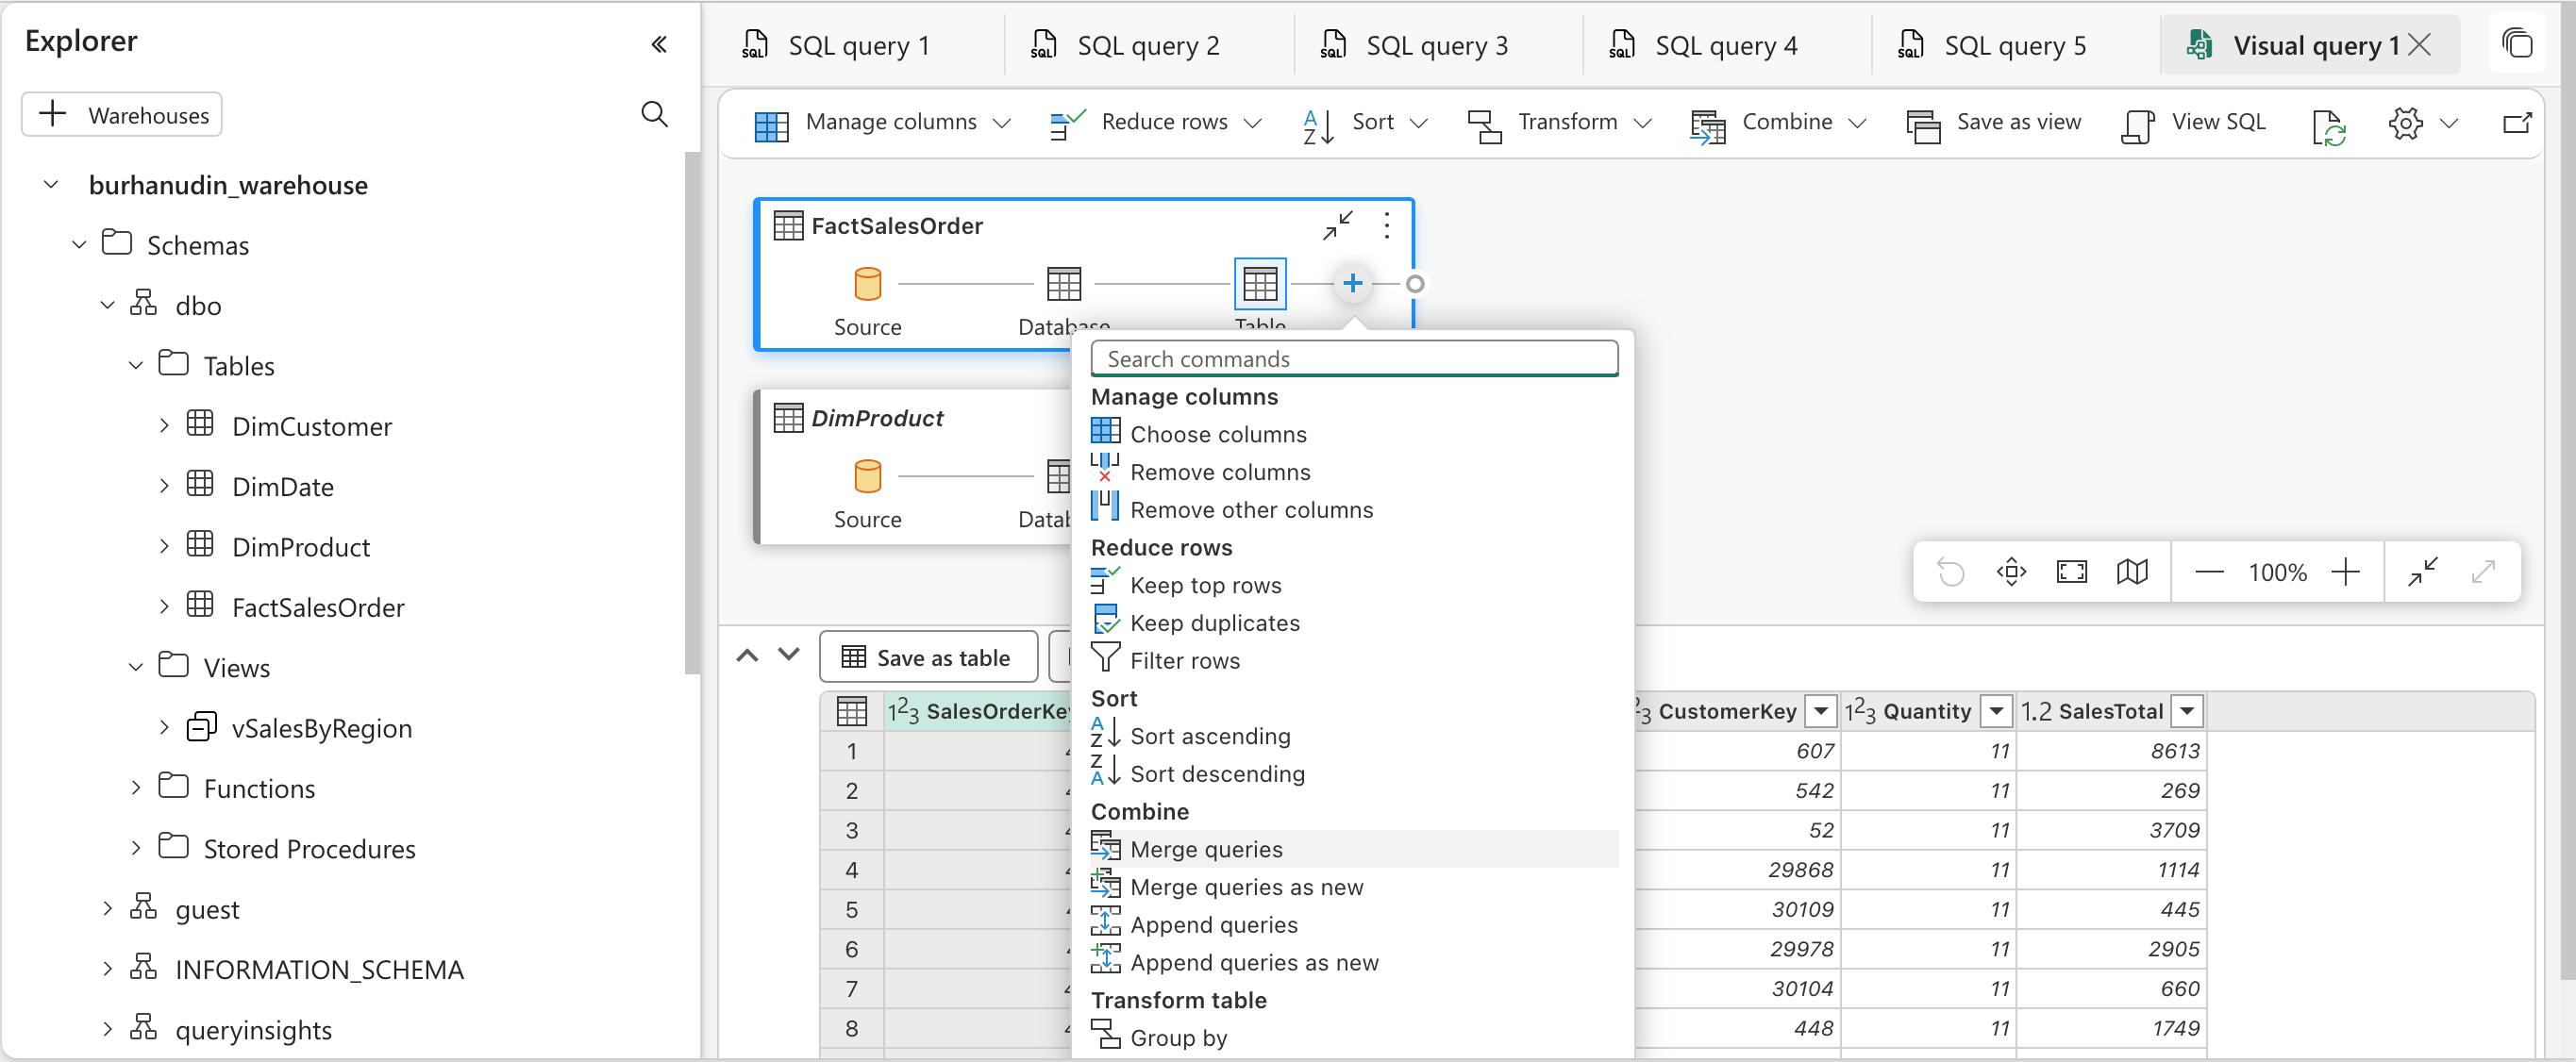
5. In the **Merge queries** window, select **DimProduct** as the right table for merge. Select **ProductKey** in both queries, leave the default **Left outer** join type, and click **OK**.

6. In the **Preview**, note that the new **DimProduct** column has been added to the FactSalesOrder table. Expand the column by clicking the arrow to the right of the column name. Select **ProductName** and click **OK**.

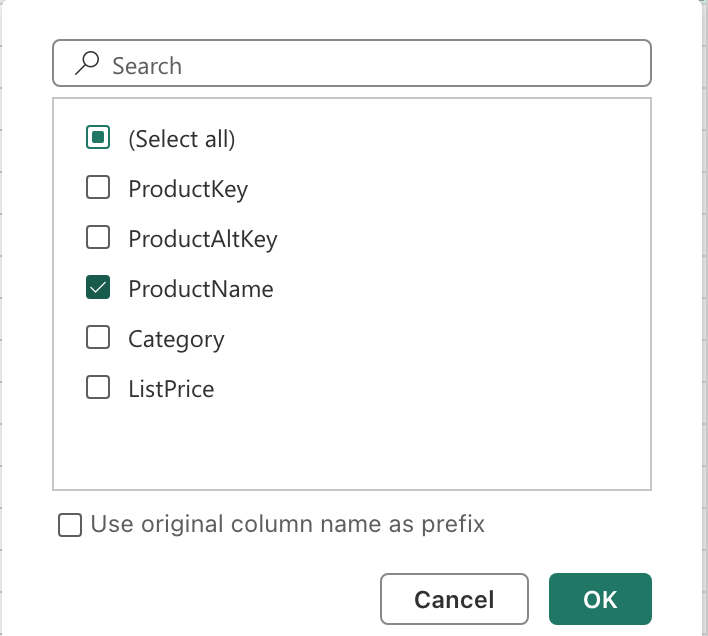
7. If you’re interested in looking at data for a single product, per a manager request, you can now use the **ProductName** column to filter the data in the query. Filter the **ProductName** column to look at **Cable Lock** data only.
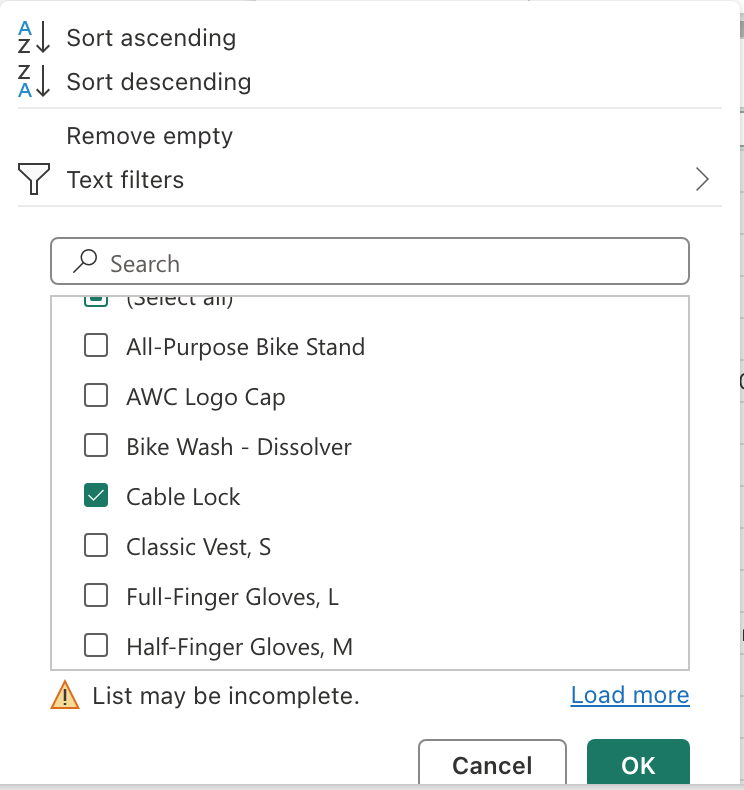
8. From here, you can analyze the results of this single query by selecting **Visualize results** or **Open in Excel**. You can now see exactly what the manager was asking for, so we don’t need to analyze the results further.

### Visualize your data
You can easily visualize the data in either a single query, or in your data warehouse. Before you visualize, hide columns and/or tables that aren’t friendly to report designers.

1. In the **Explorer** pane, select the **Model** view.

2. Hide the following columns in your Fact and Dimension tables that are not necessary to create a report. Note that this does not remove the columns from the model, it simply hides them from view on the report canvas.
    + FactSalesOrder
        + SalesOrderDateKey
        + CustomerKey
        + ProductKey
    + DimCustomer
        + CustomerKey
        + CustomerAltKey
    + DimDate
        + DateKey
        + DateAltKey
    + DimProduct
        + ProductKey
        + ProductAltKey
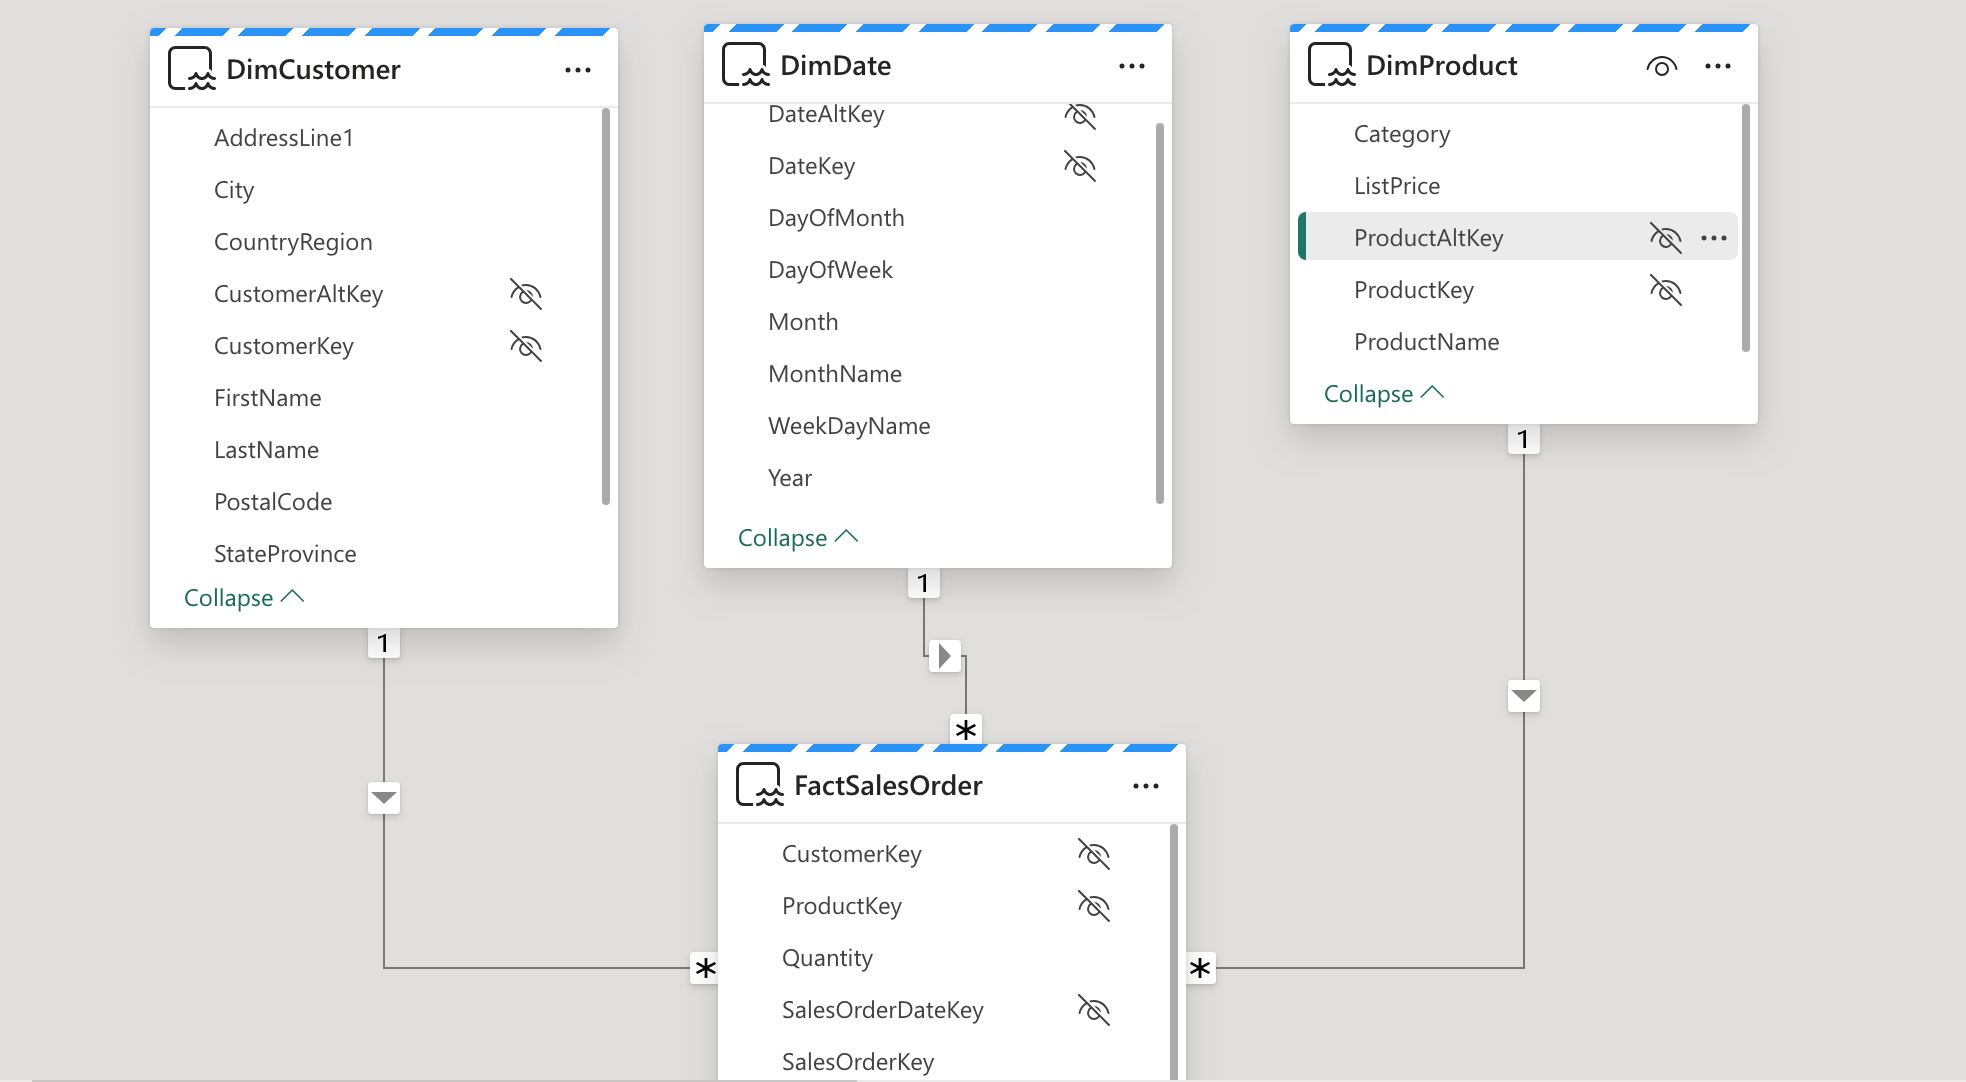
3. Now you’re ready to build a report and make this dataset available to others. On the Home menu, select **New report**. This will open a new window, where you can create a Power BI report.

4. In the **Data** pane, expand **FactSalesOrder**. Note that the columns you hid are no longer visible.

5. Select **SalesTotal**. This will add the column to the **Report canvas**. Because the column is a numeric value, the default visual is a **column chart**.
6. Ensure that the column chart on the canvas is active (with a gray border and handles), and then select **Category** from the **DimProduct** table to add a category to your column chart.
7. In the **Visualizations** pane, change the chart type from a column chart to a **clustered bar chart**. Then resize the chart as necessary to ensure that the categories are readable.

8. In the **Visualizations** pane, select the **Format your visual** tab and in the **General** sub-tab, in the **Title** section, change the **Text** to **Total Sales by Category**.

9. In the **File** menu, select **Save**. Then save the report as **Sales Report** in the workspace you created previously.
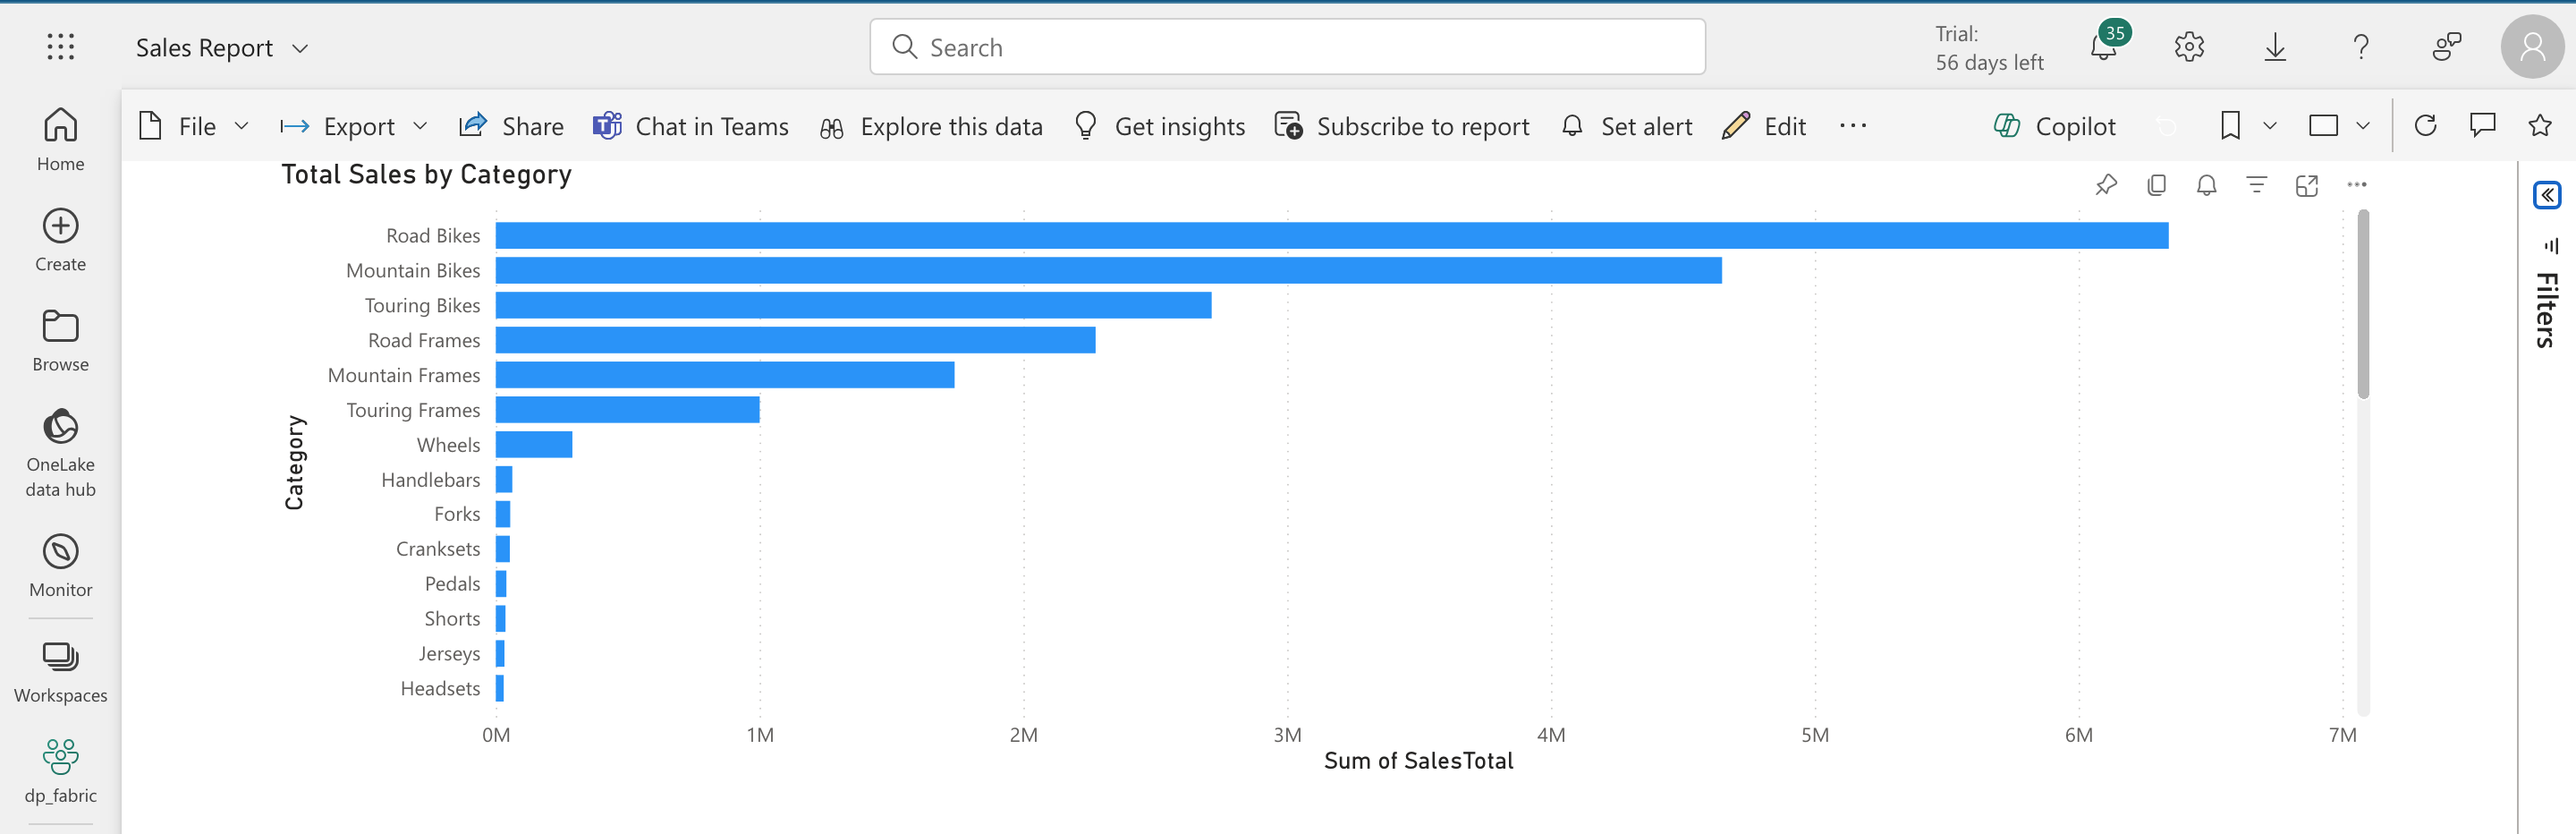
10. In the menu hub on the left, navigate back to the workspace. Notice that you now have three items saved in your workspace: your data warehouse, its default dataset, and the report you created.
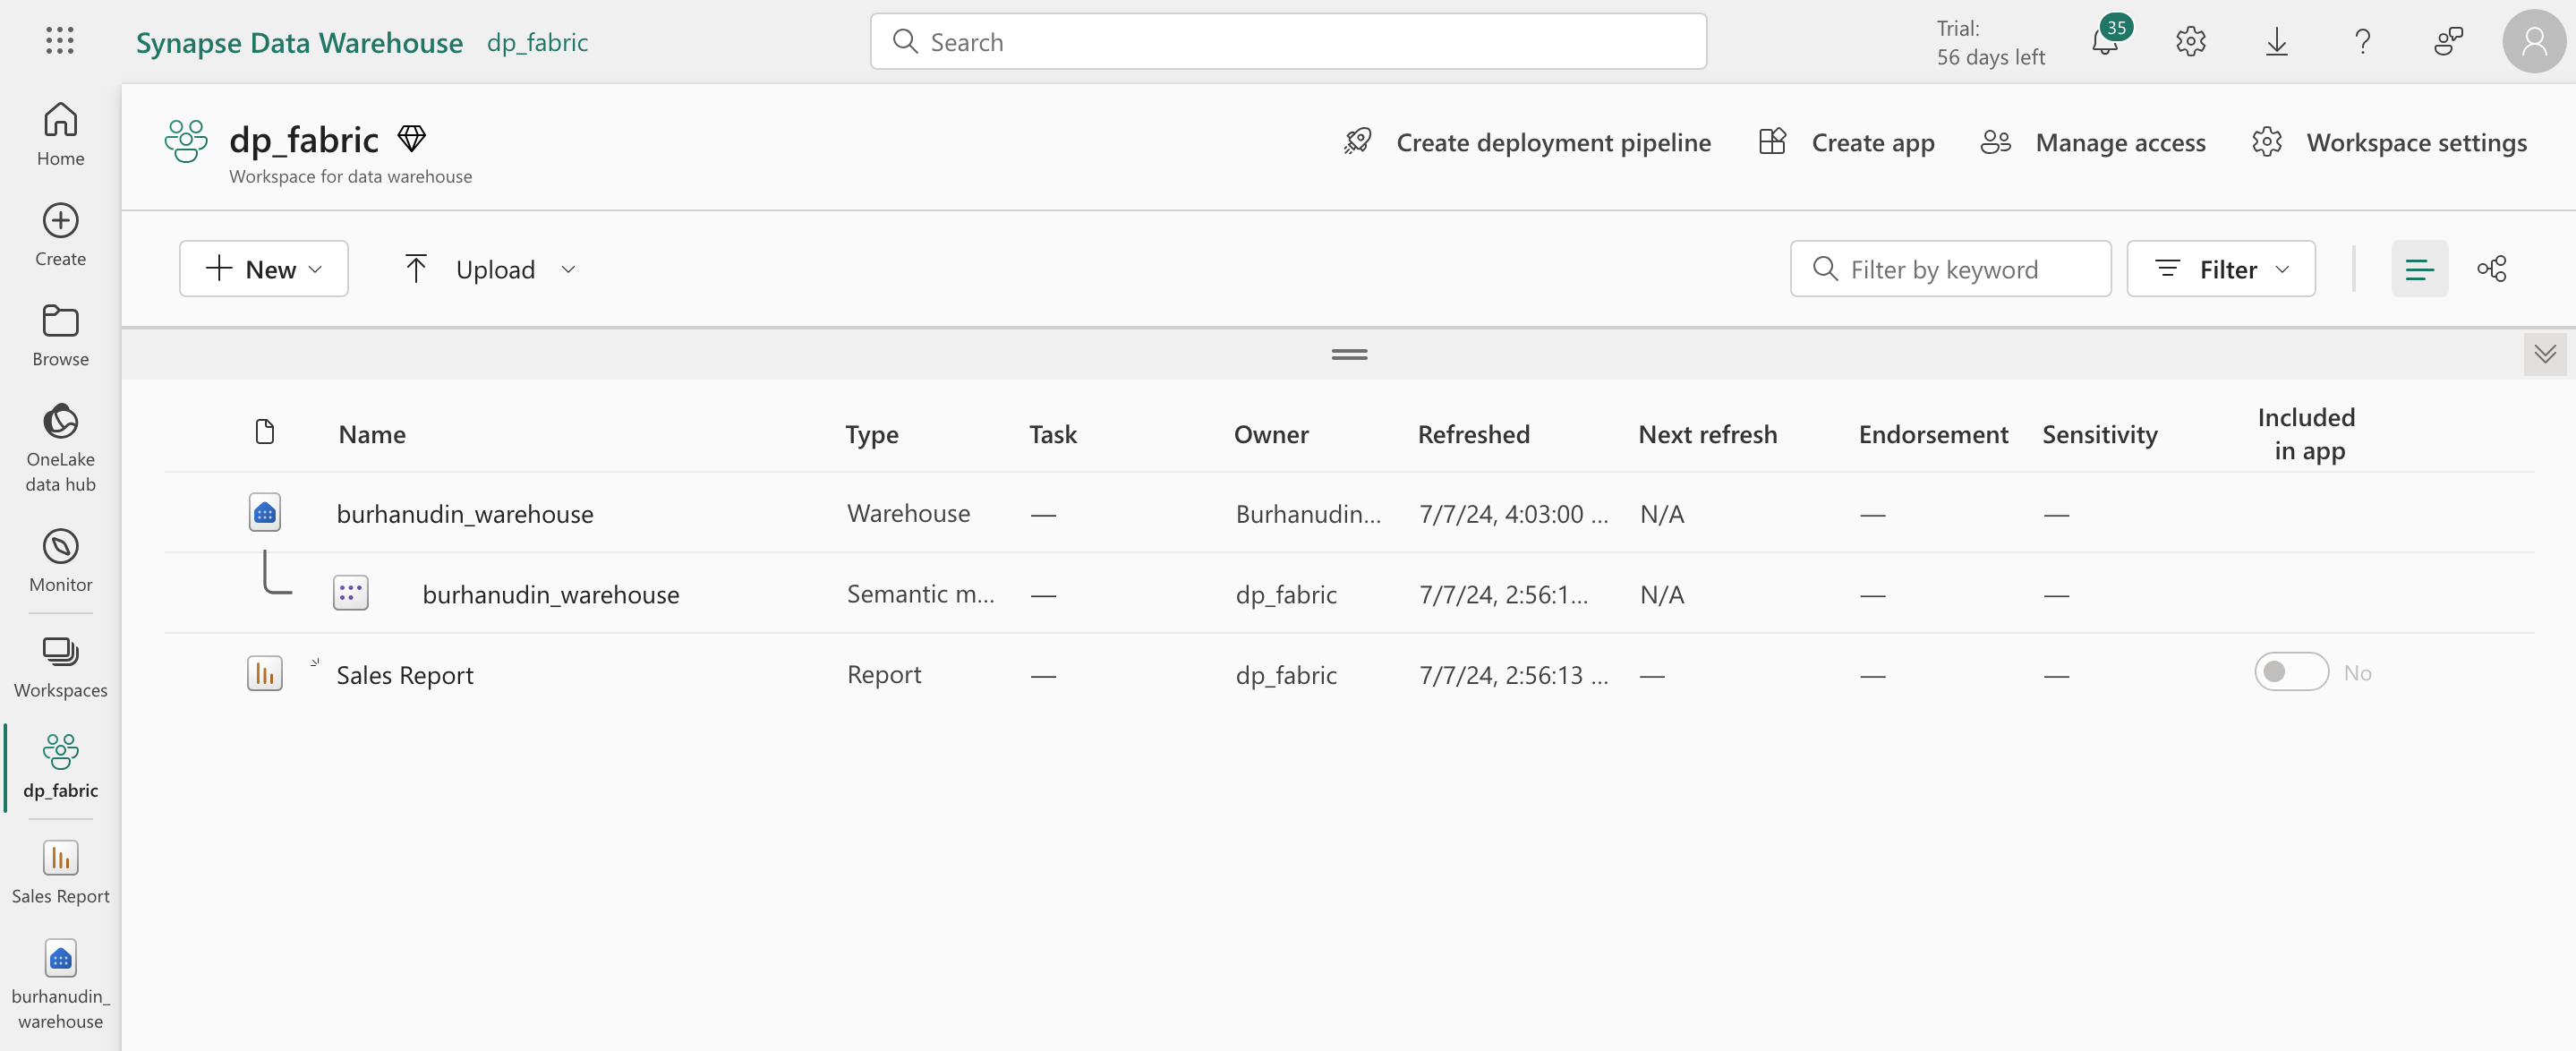

## Clean up resources

In this exercise, you have created a data warehouse that contains multiple tables. You used SQL to insert data into the tables and query them. and also used the visual query tool. Finally, you enhanced the data model for the data warehouse’s default dataset and used it as the source for a report.

If you’ve finished exploring your data warehouse, you can delete the workspace you created for this exercise.

1. In the bar on the left, select the icon for your workspace to view all of the items it contains.
2. In the … menu on the toolbar, select **Workspace settings**.
3. In the **General** section, select **Remove this workspace**